## Import data scrapped from r/coronavirus

In [1]:
# Change directory

import os 

#os.getcwd()
os.chdir('C:\\Users\\alexandre\\Thesis\\Data_Coronavirus_reddit')


In [2]:
# Create DF names for the 12 csv

for i in range(12):
    i += 1
    print('df_'+ str(i))


df_1
df_2
df_3
df_4
df_5
df_6
df_7
df_8
df_9
df_10
df_11
df_12


In [3]:
# Read the csv created by scrapping Reddit

import pandas as pd

df_1 = pd.read_csv('19_03.csv')
df_2 = pd.read_csv('21_03.csv')
df_3 = pd.read_csv('28_03.csv')
df_4 = pd.read_csv('31_03.csv')
df_5 = pd.read_csv('10_04.csv')
df_6 = pd.read_csv('11_04.csv')
df_7 = pd.read_csv('17_04.csv')
df_8 = pd.read_csv('08_05.csv')
df_9 = pd.read_csv('16_06.csv')
df_10 = pd.read_csv('15_08.csv')
df_11 = pd.read_csv('24_11.csv')
df_12 = pd.read_csv('30_12.csv')

In [5]:
# Calculate number of submission to verify no data was lost during uploading

frames = [df_1,
df_2,
df_3,
df_4,
df_5,
df_6,
df_7,
df_8,
df_9,
df_10,
df_11,
df_12]

total_submissions = 0

for i in range(12):
    lengh = len(frames[i])
    total_submissions += lengh

print('Number of Submissions scrapped on reddit: ', total_submissions)

Number of Submissions scrapped on reddit:  68229


In [5]:
# Concate all the frames created by the scrapper

frames = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12]

df = pd.concat(frames)
df

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair
0,figt2f,Total COVID-19 cases hit 249 in Australia on M...,https://imgur.com/a/E6u59Mt,tubular_radical,1,2020-03-14 11:16:43,2,/r/Coronavirus/comments/figt2f/total_covid19_c...,Oceania
1,figue8,50 new cases of the Covid-19 all traced back t...,https://says.com/my/news/40-malaysians-who-wer...,caramelfappucino,1,2020-03-14 11:20:07,67,/r/Coronavirus/comments/figue8/50_new_cases_of...,South &amp; SE Asia
2,figv2y,China allows detained Canadian Michael Kovrig ...,https://www.thestar.com/news/canada/2020/03/13...,5QxjKb7SI2j1d9Zs3jcs,1,2020-03-14 11:22:05,11,/r/Coronavirus/comments/figv2y/china_allows_de...,NaN
3,figv4b,Nvidia's calling on gaming PC owners to put th...,https://www-gamesradar-com.cdn.ampproject.org/...,7ooz,1,2020-03-14 11:22:12,0,/r/Coronavirus/comments/figv4b/nvidias_calling...,World
4,figwl9,Why Taiwan's COVID-19 death rate is shockingly...,https://m.sfgate.com/bayarea/article/Why-Taiwa...,5QxjKb7SI2j1d9Zs3jcs,1,2020-03-14 11:25:59,3,/r/Coronavirus/comments/figwl9/why_taiwans_cov...,NaN
...,...,...,...,...,...,...,...,...,...
6624,kmtz1i,Previously healthy Illinois teen dies from COV...,https://www.nydailynews.com/news/national/ny-c...,ohnoh18,1,2020-12-30 03:28:33,103,/r/Coronavirus/comments/kmtz1i/previously_heal...,USA
6625,kmu13j,Louisiana congressman-elect dies of Covid,https://www.politico.com/news/2020/12/29/luke-...,sinmantky,1,2020-12-30 03:31:56,1,/r/Coronavirus/comments/kmu13j/louisiana_congr...,USA
6626,kmu2ft,Louisiana Congressman-elect Luke Letlow dies o...,https://abcnews.go.com/US/louisiana-congressma...,Majnum,1,2020-12-30 03:34:08,4,/r/Coronavirus/comments/kmu2ft/louisiana_congr...,USA
6627,kmu4fa,Louisiana Congressman-elect Luke Letlow dead f...,https://news.yahoo.com/louisiana-congressman-l...,livefromheaven,1,2020-12-30 03:37:17,2,/r/Coronavirus/comments/kmu4fa/louisiana_congr...,Removed - Rule 5: Keep information quality high


In [6]:
# Create a copy 

import copy 

df_copy = df.copy(deep=True) # safer 

## Clean Data from reddit 

In [7]:
# Drop Nan Values in Flair column 

df_copy = df_copy[df_copy['Flair'].notna()]

print('NaN Values: ', df_copy['Flair'].isna().sum())
print('Unique Values: ', df_copy['Flair'].value_counts().sum())


NaN Values:  0
Unique Values:  62367


In [8]:
# no need for ids of submissions 
df_copy = df_copy.drop(['Post ID'], axis = 1)

# modify date format and separate daytime and hourtime 
df_copy['Publish Date'] = df_copy['Publish Date'].apply(pd.to_datetime)
df_copy['Day'] = [d.date() for d in df_copy['Publish Date']]
df_copy['Time'] = [d.time() for d in df_copy['Publish Date']]

# Drop previous column of publish date 
df_copy = df_copy.drop(['Publish Date'], axis = 1)

# Drop the url column 
df_copy = df_copy.drop(columns=['Url','Author','Permalink'], axis = 1)


df_copy.head()

,Title,Score,Total No. of Comments,Flair,Day,Time
0,Total COVID-19 cases hit 249 in Australia on M...,1,2,Oceania,2020-03-14,11:16:43
1,50 new cases of the Covid-19 all traced back t...,1,67,South &amp; SE Asia,2020-03-14,11:20:07
3,Nvidia's calling on gaming PC owners to put th...,1,0,World,2020-03-14,11:22:12
5,CoronaVirus: How to survive Corona virus in an...,1,0,World,2020-03-14,11:28:34
6,Dutch Researchers Discover Antibody Capable of...,1,1,Good News,2020-03-14,11:30:26


In [9]:
# Count number of submission by Flair

df_copy['Flair'].value_counts().iloc[:30]

USA                                                22171
World                                              10190
Europe                                              4864
Good News                                           4173
Removed - Rule 5: Keep information quality high     3647
South &amp; SE Asia                                 3293
Academic Report                                     2662
Canada                                              2111
Central &amp; East Asia                             1974
Video/Image                                         1626
Latin America                                       1052
Oceania                                              783
Vaccine News                                         709
Africa                                               567
Middle East                                          478
World Health Organization                            474
Removed - Duplicate post                             342
Centers for Disease Control and

In [10]:
# Check submissions with the Flair: 'Removed - Rule 5'

mask_flair = (df_copy['Flair'] == 'Removed - Rule 5: Keep information quality high')

df_copy[mask_flair].iloc[:30]

,Title,Score,Total No. of Comments,Flair,Day,Time
2814,Company developing device to allow people to g...,1,2,Removed - Rule 5: Keep information quality high,2020-03-25,21:56:40
2819,Sky News understands more than half a million ...,1,2,Removed - Rule 5: Keep information quality high,2020-03-25,22:14:54
2844,Hospitals debate whether to resuscitate COVID ...,1,2,Removed - Rule 5: Keep information quality high,2020-03-25,23:31:38
2854,"VNG, a technology and games company in Vietnam...",1,2,Removed - Rule 5: Keep information quality high,2020-03-25,23:54:17
2889,"Hey Reddit, can we get some traction for 'Hous...",1,2,Removed - Rule 5: Keep information quality high,2020-03-26,01:33:09
2899,COVID-19 is Telling Us What We Already Know: D...,1,2,Removed - Rule 5: Keep information quality high,2020-03-26,01:54:30
2902,"[Michael Bitzer] ""Gov Tate Reeves signed an ex...",1,2,Removed - Rule 5: Keep information quality high,2020-03-26,02:05:47
2908,FBI says a Missouri man they tried to arrest y...,1,3,Removed - Rule 5: Keep information quality high,2020-03-26,02:18:00
2918,Representative @AyannaPressley is awaiting COV...,1,2,Removed - Rule 5: Keep information quality high,2020-03-26,02:43:44
2925,Amazon has workers who tested positive for COV...,1,2,Removed - Rule 5: Keep information quality high,2020-03-26,02:48:35


In [11]:
# Display the submission about the St. Louis Fed

pd.set_option('display.max_colwidth', None)

df_copy[mask_flair].iloc[[29]]

,Title,Score,Total No. of Comments,Flair,Day,Time
3195,St. Louis Fed predicts 32% Unemployment Rate in Q2 due to COVID-19 Lockdowns and Layoffs.,1,2,Removed - Rule 5: Keep information quality high,2020-03-26,14:34:22


In [12]:
# Check for a duplicate without this Flair in the main Dataframe

df_copy[df_copy['Title'].str.contains("St. Louis Fed")]

,Title,Score,Total No. of Comments,Flair,Day,Time
3195,St. Louis Fed predicts 32% Unemployment Rate in Q2 due to COVID-19 Lockdowns and Layoffs.,1,2,Removed - Rule 5: Keep information quality high,2020-03-26,14:34:22
3198,St. Louis Fed predicts 32% Unemployment Rate in between April and June due to COVID-19,1,39,USA,2020-03-26,14:37:49


In [13]:
# Check what the flair 'entertainment' is:

mask_flair_enter = (df_copy['Flair'] == 'Entertainment')

df_copy[mask_flair_enter].iloc[:-10]

,Title,Score,Total No. of Comments,Flair,Day,Time
1775,This is how I imagine Idris Elba when he found out he got Covid-19,1,0,Entertainment,2020-03-17,04:24:58
1816,With No Sports on TV during Covid-19 this is hands down the most satisfying thing you will see all Month. Pick a Marble and enjoy,1,2,Entertainment,2020-03-17,06:25:06
1935,I made a reddit bot to give realtime updates on COVID-19!,1,5,Entertainment,2020-03-17,13:49:49
1945,I've created a subreddit for sharing stuff that is going from offline to online during times of COVID-19. Let's share!,1,2,Entertainment,2020-03-17,14:00:44
2086,I've developed a telegram bot allowing users to subscribe to updates on country specific Covid-19 updates fed by the data available at https://thevirustracker.com,1,0,Entertainment,2020-03-17,18:34:46
...,...,...,...,...,...,...
5165,Game Corona Striker - A non-profit initiative to build social awareness about COVID-19 in an engaging way.,1,0,Entertainment,2020-04-10,11:17:45
5220,Covid-19 Fresh GasGasGas Meme,1,1,Entertainment,2020-04-10,14:04:16
144,Pandemic COVID-19 2020 Discovery Documentary,1,1,Entertainment,2020-04-10,22:04:22
180,Man names adopted dog Covid.,1,4,Entertainment,2020-04-11,00:03:30


In [14]:
# Create list of Flair to keep

list_flair = ['USA','World','Europe','Good News','South &amp; SE Asia','Academic Report','Canada','Central &amp; East Asia ','Latin America', 'Oceania', 'Vaccine News', 'Africa', 'Middle East', 'World Health Organization','Centers for Disease Control and Prevention','Center for Disease Control and Prevention']

In [15]:
# Count the number of submissions by Flair and create new Dataframe with those ones

data_flairs = []

for i in range(len(list_flair)):
    data = df_copy[df_copy['Flair'].str.contains(list_flair[i])]
    data_flairs.append(data)
    i+= 1 

df_copy_2 = pd.concat(data_flairs)

print(df_copy_2['Flair'].value_counts().sum())
df_copy_2['Flair'].value_counts()

54366


USA                                           22171
World                                         10190
Europe                                         4864
Good News                                      4173
South &amp; SE Asia                            3293
Academic Report                                2662
Canada                                         2111
Latin America                                  1052
World Health Organization                       948
Oceania                                         783
Vaccine News                                    709
Africa                                          567
Middle East                                     478
Centers for Disease Control and Prevention      285
Center for Disease Control and Prevention        78
Good News (/r/all)                                1
USA (/r/all)                                      1
Name: Flair, dtype: int64

In [16]:
# Delate the Flairs containing 1 value

df_copy_2 = df_copy_2[~df_copy_2['Flair'].isin(['USA (/r/all)','Good News (/r/all)'])]

# Recount the number of submission

print(df_copy_2['Flair'].value_counts().sum())
df_copy_2['Flair'].value_counts()

54364


USA                                           22171
World                                         10190
Europe                                         4864
Good News                                      4173
South &amp; SE Asia                            3293
Academic Report                                2662
Canada                                         2111
Latin America                                  1052
World Health Organization                       948
Oceania                                         783
Vaccine News                                    709
Africa                                          567
Middle East                                     478
Centers for Disease Control and Prevention      285
Center for Disease Control and Prevention        78
Name: Flair, dtype: int64

In [17]:
# Further cleaning needed

df_copy_2

,Title,Score,Total No. of Comments,Flair,Day,Time
26,Timeline of the US president's Covid-19 Statement,1,1,USA,2020-03-14,12:26:56
31,"Senator Bob Casey on Twitter - ""Right now in America, it is easier to get an AR-15 than a test kit for COVID-19.""",1,20,USA,2020-03-14,12:45:47
34,Is Worry About COVID-19 Disrupting Your Life?,1,0,USA,2020-03-14,13:01:53
42,COVID-19 Youngstown Ohio. There are 3 confirmed cases in Youngstown Ohio St. Elizabeth Hospital in Youngstown Ohio. Employees were brought into the office and told that they would be terminated if they said anything to anybody about the cases. Why are they hiding it?,1,0,USA,2020-03-14,13:15:23
43,Colorado sets up drive-through testing station for COVID-19. Testing is free. Proof of insurance in not required.,1,434,USA,2020-03-14,13:16:56
...,...,...,...,...,...,...
1600,[I MADE] A public MIT Licensed Github repository for thoughts on solving COVID-19,1,2,Center for Disease Control and Prevention,2020-04-02,23:23:57
1778,I have found where you can purchase Covid 19 tests for £64 per test Uk based business. Have just brought 6 delivery tomorrow,1,0,Center for Disease Control and Prevention,2020-04-03,08:40:03
1850,Corona Virus (COVID-19): Vital Things You Must Know,1,0,Center for Disease Control and Prevention,2020-04-03,12:18:49
2257,"Early Release - COVID-19 Outbreak Associated with Air Conditioning in Restaurant, Guangzhou, China, 2020 - Volume 26, Number 7—July 2020 - Emerging Infectious Diseases journal",1,51,Center for Disease Control and Prevention,2020-04-04,06:16:25


In [18]:
# drop the column time

df_copy_2 = df_copy_2.drop(['Time'],axis=1)


# set the index by day, sort and rename

df_copy_2 = df_copy_2.set_index('Day')
df_copy_2 = df_copy_2.sort_index(ascending=True)
df_copy_2 = df_copy_2.rename(columns={'Title':'Submission'})
df_copy_2

,Submission,Score,Total No. of Comments,Flair
Day,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia
...,...,...,...,...
2020-12-30,Mink infected with mutated coronavirus strain escaped from Oregon farm afflicted by COVID-19 outbreak,1,3,USA
2020-12-30,Louisiana Congressman-elect Luke Letlow dies with COVID,1,50,USA
2020-12-30,Congressman-elect Luke Letlow dies from COVID-19,1,8,USA


# Text Analysis

## Clean the submissions

In [26]:
# Create a dataframe with the Flairs

df_region = pd.DataFrame(data=list_flair, columns = ['Region'])
df_region

,Region
0,USA
1,World
2,Europe
3,Good News
4,South &amp; SE Asia
5,Academic Report
6,Canada
7,Central &amp; East Asia
8,Latin America
9,Oceania


In [27]:
#Import a list of countries
countries = pd.read_csv('countries.csv')

#Create new row
new_row = {'Afghanistan':'Afghanistan'}

#Append row to the dataframe
countries = countries.append(new_row, ignore_index=True)
countries = countries.rename(columns={'Afghanistan':'Country'})

#Sort and reindex
countries = countries.sort_values('Country')
countries.reset_index(drop=True, inplace=True)


countries

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
234,Wallis And Futuna
235,Western Sahara
236,Yemen
237,Zambia


In [29]:
# Import the necessary packages to clean text

import nltk
# nltk.download('punkt') , uncomment if you need to download it 
# nltk.download('stopwords') , uncomment if you need to download it
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize


In [30]:
# Remove space 

def remove_space(s):
    return s.replace("\n"," ")

df_copy_2['Submission'] = df_copy_2['Submission'].apply(remove_space)
countries['Country'] = countries['Country'].apply(remove_space)

In [31]:
# Then remove ponctuation and lowerize sentences 

def lowerize(x):
    return x.lower()

def remove(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item
df_copy_2['Submission_clean'] = df_copy_2['Submission'].astype(str)
df_copy_2['Submission_clean'] = df_copy_2['Submission_clean'].apply(remove).apply(lowerize)
countries['Country'] = countries['Country'].apply(lowerize)

In [32]:
# tokenize
df_copy_2['Submission_clean'] = df_copy_2['Submission_clean'].apply(word_tokenize).apply(set).apply(list)


# Remove stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

df_copy_2['Submission_clean'] =  df_copy_2['Submission_clean'].apply(remove_stopwords)


In [33]:
df_copy_2

,Submission,Score,Total No. of Comments,Flair,Submission_clean
Day,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, presidents, us, statement, covid19]"
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[singapore, tested, derivative, virgin, cure, coconut, oil, covid19, filipinodeveloped]"
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[confirmed, tested, case, rwanda, march, first, east, country, coronavirus, national, becoming, 8, arrived, african, indian, mumbai, india, positive, covid19]"
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[drinking, cow, ward, party, holds, group, urine, covid19]"
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[confirmed, 27, politician, hes, case, first, today, high, rank, infected, minister, one, transportation, indonesias, covid19]"
...,...,...,...,...,...
2020-12-30,Mink infected with mutated coronavirus strain escaped from Oregon farm afflicted by COVID-19 outbreak,1,3,USA,"[outbreak, mutated, strain, afflicted, infected, coronavirus, mink, oregon, farm, covid19, escaped]"
2020-12-30,Louisiana Congressman-elect Luke Letlow dies with COVID,1,50,USA,"[covid, letlow, congressmanelect, luke, dies, louisiana]"
2020-12-30,Congressman-elect Luke Letlow dies from COVID-19,1,8,USA,"[letlow, congressmanelect, luke, dies, covid19]"


## Lift Analysis by country

In [60]:
# Word frequency

count = []
for i in range(len(df_copy_2)):
    count+=df_copy_2['Submission_clean'][i]

from nltk import FreqDist
word_freq = nltk.FreqDist(count)

countries_list = countries['Country'].tolist()

# Create list of the most mentioned countries in the news

top_words = word_freq.most_common(10000)
top_countries = []
for (key, items) in top_words:
    if key in countries_list:
        country_counts = (key,items)
        top_countries.append(country_counts)

In [61]:
top_countries_count = top_countries
print ('Below are the countries along with their frequencies in the subreddit\n' , top_countries_count[:20])

Below are the countries along with their frequencies in the subreddit
 [('us', 3474), ('uk', 1083), ('india', 1018), ('china', 707), ('singapore', 568), ('canada', 418), ('italy', 402), ('brazil', 372), ('france', 302), ('australia', 278), ('sweden', 248), ('usa', 236), ('spain', 228), ('malaysia', 227), ('pakistan', 194), ('georgia', 193), ('germany', 192), ('mexico', 153), ('korea', 120), ('indonesia', 108)]


In [73]:
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

print(Convert(top_countries_count[:20]))

{('us', 3474): ('uk', 1083), ('india', 1018): ('china', 707), ('singapore', 568): ('canada', 418), ('italy', 402): ('brazil', 372), ('france', 302): ('australia', 278), ('sweden', 248): ('usa', 236), ('spain', 228): ('malaysia', 227), ('pakistan', 194): ('georgia', 193), ('germany', 192): ('mexico', 153), ('korea', 120): ('indonesia', 108)}


In [142]:
# Create a Dataframe with the 20 most mentionned countries 

top_20_countries =[]
for country, count in top_countries_count[:21]:
    top_20_countries.append(country)

df_top_20_countries = pd.DataFrame(columns = top_20_countries)

In [143]:
df_top_20_countries

,us,uk,india,china,singapore,canada,italy,brazil,france,australia,...,usa,spain,malaysia,pakistan,georgia,germany,mexico,korea,indonesia,israel


In [144]:
def country_mentioned(item):
    if country in item:
        return 1
    else:
        return 0
      
for country in top_20_countries:
    df_top_20_countries[country] = df_copy_2['Submission_clean'].apply(country_mentioned)

In [145]:
# Add the mentions of US and USA

df_top_20_countries['us'] = df_top_20_countries['us'] + df_top_20_countries['usa']
df_top_20_countries = df_top_20_countries.drop(['usa'],axis = 1)

In [146]:
del top_20_countries[11]
top_20_countries

['us',
 'uk',
 'india',
 'china',
 'singapore',
 'canada',
 'italy',
 'brazil',
 'france',
 'australia',
 'sweden',
 'spain',
 'malaysia',
 'pakistan',
 'georgia',
 'germany',
 'mexico',
 'korea',
 'indonesia',
 'israel']

In [160]:
# Calculate lift among top countries

Countries_lifts = pd.DataFrame(columns = top_20_countries)
for i in range(len(top_20_countries)):
    new_list = []
    for j in range(len(top_20_countries)):
        if (i!=j):
            numerator = ((df_top_20_countries[top_20_countries[i]] + df_top_20_countries[top_20_countries[j]]) > 1).sum()
            denominator = df_top_20_countries[top_20_countries[j]].sum()*df_top_20_countries[top_20_countries[i]].sum()
            lift = numerator*len(df_top_20_countries)/denominator
            Countries_lifts.loc[top_20_countries[i],top_20_countries[j]] = lift
print ('Below are the lift ratios among top countries\n')
Countries_lifts = Countries_lifts.fillna(0)
Countries_lifts

Below are the lift ratios among top countries



,us,uk,india,china,singapore,canada,italy,brazil,france,australia,sweden,spain,malaysia,pakistan,georgia,germany,mexico,korea,indonesia,israel
us,0.000000,1.082428,0.762896,2.176243,0.541762,1.612572,1.640303,1.693803,1.067464,1.001489,1.240809,1.221114,0.839180,1.057460,1.670332,2.060630,2.202794,3.052785,1.763831,3.289532
uk,1.082428,0.000000,0.345170,0.426005,0.441880,0.960720,2.622263,1.079518,2.493258,0.541701,2.024097,2.641979,0.000000,0.517501,0.000000,2.614458,0.000000,2.928193,0.000000,0.512220
india,0.762896,0.345170,0.000000,2.114960,0.094019,0.000000,1.062741,2.009781,0.530491,0.384192,0.215334,0.234223,0.470509,3.578535,0.000000,1.112557,0.000000,1.335069,0.000000,0.544926
china,2.176243,0.426005,2.114960,0.000000,0.812260,1.287697,4.590682,1.033520,1.273078,2.489371,0.620112,2.360778,1.354959,1.981802,0.000000,2.803424,0.502575,1.281565,2.847923,0.784632
singapore,0.541762,0.441880,0.094019,0.812260,0.000000,0.000000,0.000000,0.000000,0.316925,0.000000,0.000000,0.419786,2.529813,0.000000,0.000000,0.000000,0.000000,1.595188,0.000000,0.000000
canada,1.612572,0.960720,0.000000,1.287697,0.000000,0.000000,0.323526,0.000000,0.861307,0.935665,0.524425,0.570427,0.000000,0.000000,0.000000,0.677382,1.700097,0.000000,0.000000,0.000000
italy,1.640303,2.622263,1.062741,4.590682,0.000000,0.323526,0.000000,1.090595,5.373530,0.486453,1.090595,11.269486,0.000000,0.000000,0.000000,7.043429,0.883881,3.380846,1.252165,0.000000
brazil,1.693803,1.079518,2.009781,1.033520,0.000000,0.000000,1.090595,0.000000,0.000000,0.525683,0.000000,0.640964,0.000000,0.000000,0.000000,0.000000,1.910324,0.000000,0.000000,0.000000
france,1.067464,2.493258,0.530491,1.273078,0.316925,0.861307,5.373530,0.000000,0.000000,0.647530,1.451720,13.422040,0.793010,1.855807,0.000000,14.063535,0.000000,4.500331,0.000000,3.673740
australia,1.001489,0.541701,0.384192,2.489371,0.000000,0.935665,0.486453,0.525683,0.647530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.018510,0.000000,1.629616,1.810685,0.000000


In [155]:
# Calculate the dissimilarity matrix

import numpy as np

print ('Below is the dissimilarity matrix for the top brands\n')

# Avoid inf values by replacing 0

Dissimilarity_between_countries = Countries_lifts.replace(0, np.nan)
Dissimilarity_between_countries = 1/Dissimilarity_between_countries

Dissimilarity_between_countries = Dissimilarity_between_countries.fillna(0)
Dissimilarity_between_countries

Below is the dissimilarity matrix for the top brands



,us,uk,india,china,singapore,canada,italy,brazil,france,australia,sweden,spain,malaysia,pakistan,georgia,germany,mexico,korea,indonesia,israel
us,0.000000,0.923849,1.310794,0.459508,1.845829,0.620127,0.609644,0.590387,0.936800,0.998513,0.805925,0.818924,1.191640,0.945663,0.598683,0.485288,0.453969,0.327570,0.566948,0.303995
uk,0.923849,0.000000,2.897122,2.347390,2.263056,1.040886,0.381350,0.926339,0.401082,1.846038,0.494048,0.378504,0.000000,1.932363,0.000000,0.382488,0.000000,0.341508,0.000000,1.952285
india,1.310794,2.897122,0.000000,0.472822,10.636156,0.000000,0.940963,0.497567,1.885046,2.602862,4.643956,4.269443,2.125359,0.279444,0.000000,0.898830,0.000000,0.749025,0.000000,1.835111
china,0.459508,2.347390,0.472822,0.000000,1.231133,0.776580,0.217833,0.967567,0.785498,0.401708,1.612611,0.423589,0.738030,0.504591,0.000000,0.356707,1.989754,0.780296,0.351133,1.274483
singapore,1.845829,2.263056,10.636156,1.231133,0.000000,0.000000,0.000000,0.000000,3.155323,0.000000,0.000000,2.382165,0.395286,0.000000,0.000000,0.000000,0.000000,0.626885,0.000000,0.000000
canada,0.620127,1.040886,0.000000,0.776580,0.000000,0.000000,3.090943,0.000000,1.161026,1.068759,1.906850,1.753072,0.000000,0.000000,0.000000,1.476271,0.588202,0.000000,0.000000,0.000000
italy,0.609644,0.381350,0.940963,0.217833,0.000000,3.090943,0.000000,0.916930,0.186097,2.055699,0.916930,0.088735,0.000000,0.000000,0.000000,0.141976,1.131374,0.295784,0.798617,0.000000
brazil,0.590387,0.926339,0.497567,0.967567,0.000000,0.000000,0.916930,0.000000,0.000000,1.902288,0.000000,1.560150,0.000000,0.000000,0.000000,0.000000,0.523471,0.000000,0.000000,0.000000
france,0.936800,0.401082,1.885046,0.785498,3.155323,1.161026,0.186097,0.000000,0.000000,1.544331,0.688838,0.074504,1.261018,0.538849,0.000000,0.071106,0.000000,0.222206,0.000000,0.272202
australia,0.998513,1.846038,2.602862,0.401708,0.000000,1.068759,2.055699,1.902288,1.544331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.981826,0.000000,0.613641,0.552277,0.000000


### MDS

No handles with labels found to put in legend.
<ipython-input-232-cd426b13531f>:23: RuntimeWarning: divide by zero encountered in true_divide
  similarities = similarities.max() / (similarities) * 100


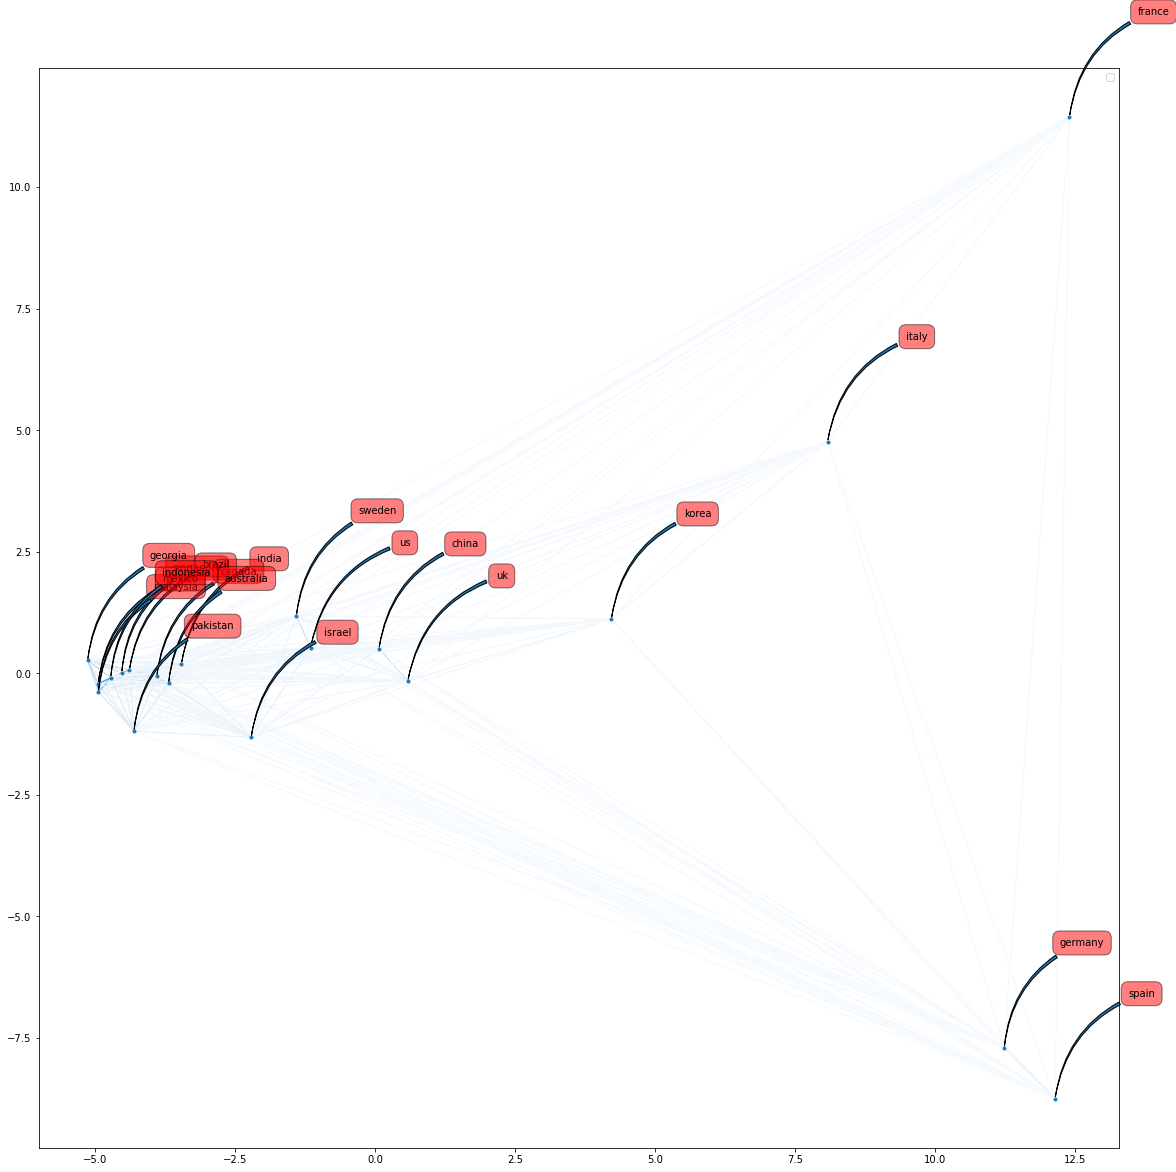

In [232]:
# import the necessary packages

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

similarities = euclidean_distances(Countries_lifts)
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)

# Rotate the data

clf = PCA(n_components=2)
Countries_lifts = clf.fit_transform(Countries_lifts)
fig = plt.figure(figsize=(15,15))
ax = plt.axes([0., 0., 1., 1.])
s = 100

plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / (similarities) * 100
np.fill_diagonal(similarities, 0)

# Plot the edges

segments = [[Countries_lifts[i, :], Countries_lifts[j, :]]
            for i in range(len(Countries_lifts)) for j in range(len(Countries_lifts))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.9))
ax.add_collection(lc)

#add labels

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    Countries_lifts[:, 0], Countries_lifts[:, 1], marker = '.'
    )

for label, x, y in zip(top_20_countries, Countries_lifts[:, 0], Countries_lifts[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (100, 100),
        textcoords = 'offset pixels', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'red', alpha = 0.5),
        arrowprops = dict(arrowstyle = 'wedge', connectionstyle = 'arc3,rad=0.3'))
plt.show()

## Attribute Analysis

In [235]:
# Word frequency by attribute

count = []
for i in range(len(df_copy_2)):
    count+=df_copy_2['Submission_clean'][i]

word_freq = nltk.FreqDist(count)

top_words = word_freq.most_common(500)
top_words[:300]

[('covid19', 45780),
 ('covid', 7882),
 ('cases', 6892),
 ('new', 5090),
 ('’', 4462),
 ('vaccine', 3933),
 ('coronavirus', 3740),
 ('us', 3474),
 ('deaths', 3113),
 ('positive', 2920),
 ('says', 2565),
 ('patients', 2287),
 ('health', 2062),
 ('test', 1965),
 ('pandemic', 1903),
 ('people', 1883),
 ('first', 1869),
 ('study', 1723),
 ('tests', 1685),
 ('death', 1642),
 ('‘', 1543),
 ('may', 1399),
 ('could', 1378),
 ('reports', 1342),
 ('testing', 1312),
 ('world', 1190),
 ('spread', 1167),
 ('virus', 1164),
 ('19', 1103),
 ('hospital', 1096),
 ('uk', 1083),
 ('data', 1082),
 ('help', 1044),
 ('news', 1041),
 ('state', 1029),
 ('india', 1018),
 ('due', 996),
 ('trump', 990),
 ('outbreak', 962),
 ('treatment', 909),
 ('case', 888),
 ('million', 874),
 ('one', 867),
 ('get', 856),
 ('day', 853),
 ('confirmed', 839),
 ('say', 830),
 ('workers', 829),
 ('fight', 823),
 ('dies', 823),
 ('tested', 822),
 ('amid', 805),
 ('florida', 800),
 ('2020', 798),
 ('risk', 782),
 ('response', 775),
 

In [238]:
# Calculate lift values between countries attributes

top_attributes = ['cases','deaths','positive','patients','death','tests','testing','spread','tested','risk','reported','outbreak','dies','record','lockdown','infection','surge','crisis','infected','hospitalizations'] 

countries_top_attributes = pd.DataFrame(columns = top_attributes)

def attribute_mentioned(item):
    if attribute in item:
        return 1
    else:
        return 0
      
for attribute in top_attributes:
    countries_top_attributes[attribute] = df_copy_2['Submission_clean'].apply(attribute_mentioned)

lift_countries_attributes=pd.DataFrame(columns = top_20_countries)
for i in range(len(top_attributes)):
    for j in range(len(top_20_countries)):
          numerator = ((countries_top_attributes[top_attributes[i]] + df_top_20_countries[top_20_countries[j]]) > 1).sum()
          denominator = countries_top_attributes[top_attributes[i]].sum()*df_top_20_countries[top_20_countries[j]].sum()
          lift = numerator*len(df_top_20_countries)/denominator
          lift_countries_attributes.loc[top_attributes[i],top_20_countries[j]] = lift
      
lift_countries_attributes

,us,uk,india,china,singapore,canada,italy,brazil,france,australia,sweden,spain,malaysia,pakistan,georgia,germany,mexico,korea,indonesia,israel
cases,1.33096,0.874015,1.96037,0.859088,3.24963,1.32095,1.4324,1.56912,2.14177,1.33358,0.79516,2.45635,4.20461,1.50441,2.45222,1.31466,1.03111,1.70906,1.09555,0.885386
deaths,1.89228,1.48351,0.960666,0.494018,0.276711,0.919134,3.43189,3.99032,2.25523,0.376911,2.53503,3.37016,1.30784,0.450091,1.99066,0.818603,2.85352,0.873177,1.2936,0
positive,0.526919,0.773593,0.78641,0.421337,0.590001,0.311781,0.694694,0.600574,0.493187,0.736676,0.525503,0.489942,0.410084,0.959681,2.89396,2.32723,1.09517,1.39634,0.517161,0.949888
patients,0.647132,0.812117,0.957373,0.941421,0.795153,0.170604,0.946105,0.255601,2.12521,0.25652,1.05435,0.729808,0.314153,1.10277,1.23165,1.73329,1.24292,1.38663,0.880403,0.97024
death,1.63311,1.65083,0.845598,0.561953,0.699473,0.71286,2.55314,2.04703,1.20594,1.07185,2.00252,2.17818,1.75022,2.38927,1.02928,1.03464,3.46232,0.275903,3.06559,0.337841
tests,0.895725,0.774562,0.982484,0.501978,0.965633,0.308742,0.561802,0.954028,0.213666,1.27661,1.30095,0.42452,0.14213,0.831534,1.67168,2.01647,1.26524,1.88204,0.298736,1.97532
testing,1.15038,1.26259,1.01758,0.527474,1.24016,0.594775,0.721522,0.222774,0.27441,1.34145,0.501242,0.181737,0,1.06794,0.858777,1.07906,0.541647,4.4889,1.151,1.69126
spread,1.05474,0.602199,0.732171,1.12013,0.820148,1.22591,1.04293,0.500908,0.308506,3.01626,0.751361,0.408635,0.205218,1.92101,0.72411,0.970508,2.74026,0.776407,1.29401,2.37676
tested,1.12307,0.854947,1.03947,0.37418,1.04793,0.949324,0.493554,1.06671,0.656983,1.9032,0.800035,0.870214,0,1.02273,4.1121,5.85581,0.864526,5.51135,1.83712,1.34972
risk,0.974393,0.706104,0.34145,0.688309,0.611965,0.498941,0.345867,0,0.690588,0.250069,1.12128,0.914726,0,0.358346,0.360203,0.362079,0.454374,0,0,0


## Cosine similarity by region

In [36]:
def join_words(comment):   
    """Joins the tokenized words to a sentence"""
    return " ".join(comment) 

df_copy_2['joined_submission'] = df_copy_2['Submission_clean'].map(join_words)

In [240]:
# Create a list of attributes

input_list = ['deaths', 'testing', 'tested','outbreak', 'record','surge','hospitalizations']
input_attributes =  " ".join(input_list)

In [243]:
df_copy_2.head()

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission
Day,,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, statement, presidents, us, covid19]",timeline statement presidents us covid19
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[coconut, virgin, derivative, oil, covid19, singapore, cure, filipinodeveloped, tested]",coconut virgin derivative oil covid19 singapore cure filipinodeveloped tested
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[case, arrived, first, tested, march, east, indian, india, african, covid19, rwanda, 8, positive, mumbai, confirmed, coronavirus, country, becoming, national]",case arrived first tested march east indian india african covid19 rwanda 8 positive mumbai confirmed coronavirus country becoming national
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[ward, group, party, cow, holds, drinking, covid19, urine]",ward group party cow holds drinking covid19 urine
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[case, first, one, today, high, infected, indonesias, minister, politician, 27, rank, covid19, hes, transportation, confirmed]",case first one today high infected indonesias minister politician 27 rank covid19 hes transportation confirmed


In [263]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


import en_core_web_lg
nlp = en_core_web_lg.load()

In [264]:
# Calculate cosine similarity between the list of attributes and the submissions

def word_vector_similarity(submission):
    doc1 = nlp(submission)
    doc2 = nlp(input_attributes)
    return doc1.similarity(doc2)

df_copy_2['similarity'] = df_copy_2['joined_submission'].map(word_vector_similarity)

In [269]:
# Group by Flair

df_copy_3 = df_copy_2.groupby(by=df_copy_2['Flair']).mean()
df_copy_3

,Score,Total No. of Comments,similarity
Flair,,,
Academic Report,15.974080,21.840346,0.552895
Africa,7.118166,8.689594,0.493477
Canada,8.812411,17.461393,0.523125
Center for Disease Control and Prevention,1.756410,12.961538,0.520131
Centers for Disease Control and Prevention,3.459649,18.694737,0.574103
Europe,10.854030,26.237870,0.518527
Good News,32.391325,31.635754,0.528392
Latin America,18.485741,14.038973,0.506095
Middle East,6.083682,11.761506,0.506127


In [270]:
# Group by region

df_copy_3 = df_copy_3.drop(df_copy_3.index[[0,3,4,6,12,14]])
df_copy_3

,Score,Total No. of Comments,similarity
Flair,,,
Africa,7.118166,8.689594,0.493477
Canada,8.812411,17.461393,0.523125
Europe,10.854030,26.237870,0.518527
Latin America,18.485741,14.038973,0.506095
Middle East,6.083682,11.761506,0.506127
Oceania,6.844189,19.683269,0.518405
South &amp; SE Asia,4.380200,8.968722,0.506032
USA,36.014614,44.028821,0.526548
World,14.274681,21.358292,0.512804


In [271]:
df_copy_3.sort_values(by='similarity', ascending = False)

,Score,Total No. of Comments,similarity
Flair,,,
USA,36.014614,44.028821,0.526548
Canada,8.812411,17.461393,0.523125
Europe,10.854030,26.237870,0.518527
Oceania,6.844189,19.683269,0.518405
World,14.274681,21.358292,0.512804
Middle East,6.083682,11.761506,0.506127
Latin America,18.485741,14.038973,0.506095
South &amp; SE Asia,4.380200,8.968722,0.506032
Africa,7.118166,8.689594,0.493477


In [272]:
# Calculate cosine similarity between a single attribute and the submissions

def single_word_vector_similarity(review):
    doc1 = nlp(review)
    doc2 = nlp(single_attribute)
    return doc1.similarity(doc2)

In [275]:
# Create copy of the previous Dataframe

df_copy_4 = df_copy_2

In [277]:
# Calculate cosine similarity between the attribute 'deaths' and the submissions

single_attribute = ['deaths']
single_attribute =  " ".join(single_attribute)
df_copy_4['similarity_deaths'] = df_copy_4['joined_submission'].map(single_word_vector_similarity)

<ipython-input-272-5fa06bbe4ce7>:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


In [278]:
# Calculate cosine similarity between the attribute 'tested' and the submissions

single_attribute = ['tested']
single_attribute =  " ".join(single_attribute)
df_copy_4['similarity_tested'] = df_copy_4['joined_submission'].map(single_word_vector_similarity)

<ipython-input-272-5fa06bbe4ce7>:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


In [279]:
# Calculate cosine similarity between the attribute 'hospitalizations' and the submissions

single_attribute = ['hospitalizations']
single_attribute =  " ".join(single_attribute)
df_copy_4['similarity_hospitalizations'] = df_copy_4['joined_submission'].map(single_word_vector_similarity)

<ipython-input-272-5fa06bbe4ce7>:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


In [280]:
# Calculate cosine similarity between the attribute 'lockdown' and the submissions

single_attribute = ['lockdown']
single_attribute =  " ".join(single_attribute)
df_copy_4['similarity_lockdown'] = df_copy_4['joined_submission'].map(single_word_vector_similarity)

<ipython-input-272-5fa06bbe4ce7>:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


In [281]:
# Calculate cosine similarity between the attribute 'surge' and the submissions

single_attribute = ['surge']
single_attribute =  " ".join(single_attribute)
df_copy_4['similarity_surge'] = df_copy_4['joined_submission'].map(single_word_vector_similarity)

<ipython-input-272-5fa06bbe4ce7>:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return doc1.similarity(doc2)


In [289]:
# Calculate the mean cosine similarity between each region and single attribute

df_copy_5 = df_copy_4.groupby('Flair')['similarity_deaths','similarity_tested','similarity_hospitalizations','similarity_lockdown','similarity_surge'].mean()
df_copy_5 = df_copy_5.drop(df_copy_5.index[[0,3,4,6,12,14]])
df_copy_5

,similarity_deaths,similarity_tested,similarity_hospitalizations,similarity_lockdown,similarity_surge
Flair,,,,,
Africa,0.399063,0.283681,0.180740,0.170572,0.305663
Canada,0.395677,0.314354,0.195488,0.174949,0.328944
Europe,0.395065,0.319211,0.199730,0.167931,0.312091
Latin America,0.412711,0.286764,0.207077,0.160033,0.308385
Middle East,0.401201,0.297917,0.202019,0.189171,0.319489
Oceania,0.381749,0.319766,0.173296,0.188951,0.328164
South &amp; SE Asia,0.381927,0.319121,0.188861,0.170259,0.308226
USA,0.398426,0.319842,0.198427,0.184037,0.326329
World,0.365960,0.338963,0.189032,0.154704,0.310092


## Engagement Analysis 

In [296]:
# Create Dataframe to calculate an engagement score

df_engagement = df_copy_2.copy(deep=True)
df_engagement = df_engagement.drop(['similarity_hospitalizations'],axis=1)
df_engagement = df_engagement.drop(['similarity','similarity_deaths','similarity_tested','similarity_lockdown','similarity_surge'],axis=1)

In [301]:
# Create a normalized score

df_engagement['No. of Comments normalized'] = df_engagement['Total No. of Comments'] / df_engagement['Total No. of Comments'].max()
df_engagement['score_normalized'] = df_engagement['Score']/df_engagement['Score'].max()

In [305]:
# Create an engagement score 

df_engagement['engagement_score'] = 0.4*df_engagement['No. of Comments normalized'] + 0.6*df_engagement['score_normalized']


In [312]:
# Set treshold for the logistic regression to the median score

engagement_median = df_engagement["engagement_score"].median()
df_engagement["engagement"] = df_engagement["engagement_score"].apply(lambda x: 1 if x > engagement_median else 0)
df_engagement.head()

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, statement, presidents, us, covid19]",timeline statement presidents us covid19,0.000075,0.000017,0.000040,0
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[coconut, virgin, derivative, oil, covid19, singapore, cure, filipinodeveloped, tested]",coconut virgin derivative oil covid19 singapore cure filipinodeveloped tested,0.000452,0.000017,0.000191,1
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[case, arrived, first, tested, march, east, indian, india, african, covid19, rwanda, 8, positive, mumbai, confirmed, coronavirus, country, becoming, national]",case arrived first tested march east indian india african covid19 rwanda 8 positive mumbai confirmed coronavirus country becoming national,0.002710,0.000017,0.001094,1
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[ward, group, party, cow, holds, drinking, covid19, urine]",ward group party cow holds drinking covid19 urine,0.003764,0.000017,0.001516,1
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[case, first, one, today, high, infected, indonesias, minister, politician, 27, rank, covid19, hes, transportation, confirmed]",case first one today high infected indonesias minister politician 27 rank covid19 hes transportation confirmed,0.000828,0.000017,0.000341,1


In [317]:
# Import the necessary packages for the logistic regression

from instaloader import Profile
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C:\Users\alexa\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


In [349]:
from copy import deepcopy

df_engagement_copy = copy.deepcopy(df_engagement)

#Create a function to perform the logistic regression

def logReg(i):

    #split the data into our training data and test data with an 80/20 split
    X_train, X_test, y_train,y_test = train_test_split(i,df_engagement_copy['engagement'] ,test_size= 0.2, random_state=20)
    
    tfidf_vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)

    fitted_vectorizer=tfidf_vectorizer.fit(X_train)
    tfidf_vectorizer_vectors=fitted_vectorizer.transform(X_train)

    test_features = tfidf_vectorizer.transform(X_test)

    train_target = y_train
    test_target = y_test
    classifier = LogisticRegression(solver='sag', C=10)

    y_train= y_train.astype('int')
    y_test = y_test.astype('int')

    classifier=classifier.fit(tfidf_vectorizer_vectors, train_target)
    
    #Predict on our test data
    y_pred=classifier.predict(test_features)

    #print out the confusion matrix 
    print("Confusion Matrix is : ")
    print(confusion_matrix(test_target, y_pred))
    print()

    #print out the accuracy separately
    print('The accuracy is',accuracy_score(test_target,y_pred))
    print()
    
    #print out a whole classification report
    print("Classification Report is : ")
    print(classification_report(test_target, y_pred))
    
    print(classifier.score(test_features,y_pred))
    importance = classifier.coef_[0]
    
    # summarize feature importance
    for i,v in enumerate(importance):
        allFeat = pd.Series(importance, index=tfidf_vectorizer.get_feature_names() )
        allFeat.nlargest(10).plot(kind='barh')

In [315]:
# Change type to string

df_engagement['Submission_clean'] = df_engagement['Submission_clean'].astype(str)

Confusion Matrix is : 
[[3172 2224]
 [2090 3387]]

The accuracy is 0.6032373769888715

Classification Report is : 
              precision    recall  f1-score   support

           0       0.60      0.59      0.60      5396
           1       0.60      0.62      0.61      5477

    accuracy                           0.60     10873
   macro avg       0.60      0.60      0.60     10873
weighted avg       0.60      0.60      0.60     10873

1.0


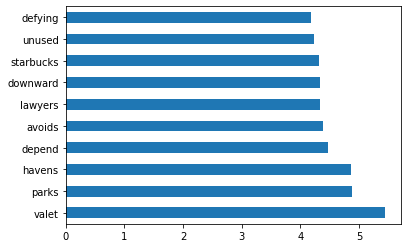

In [350]:
# Run logistic regression to know which words generate the highest engagement

Submission_list=[]

for i in df_engagement['Submission_clean']:
    submission='' 
    submission=submission+ i + ' '
    Submission_list.append(submission)  


logReg(Submission_list)

In [354]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('valet')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-05-07,Trump valet has COVID-19; president again tests negative,1,7,USA,"['president', 'negative', 'valet', 'tests', 'covid19', 'trump']",president negative valet tests covid19 trump,0.000527,0.000017,0.000221,1
2020-05-07,One of the Potus’s personal valets tests positive for COVID-19,124,234,USA,"['positive', 'personal', 'valets', '’', 'tests', 'one', 'potus', 'covid19']",positive personal valets ’ tests one potus covid19,0.017615,0.002112,0.008313,1
2020-05-07,Trump's valet tests positive for COVID-19,1,0,USA,"['positive', 'valet', 'tests', 'covid19', 'trumps']",positive valet tests covid19 trumps,0.000000,0.000017,0.000010,0


In [355]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('parks')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-03-16,"Assam (one of India's 29 states) closes schools, gyms, national parks as a preventive measure against Covid-19",1,14,South &amp; SE Asia,"['preventive', 'gyms', 'schools', '29', 'closes', 'indias', 'one', 'covid19', 'measure', 'parks', 'national', 'states', 'assam']",preventive gyms schools 29 closes indias one covid19 measure parks national states assam,0.001054,0.000017,0.000432,1
2020-03-18,Suspending prison visits over COVID-19 sparks fears of inmate backlash,1,15,Canada,"['suspending', 'visits', 'fears', 'sparks', 'covid19', 'inmate', 'backlash', 'prison']",suspending visits fears sparks covid19 inmate backlash prison,0.001129,0.000017,0.000462,1
2020-03-19,Burr Recording Sparks Questions About Private Comments On COVID-19,1,3,USA,"['private', 'comments', 'recording', 'burr', 'sparks', 'covid19', 'questions']",private comments recording burr sparks covid19 questions,0.000226,0.000017,0.000101,0
2020-03-19,Burr Recording Sparks Questions About Private Comments On COVID-19,1,36,USA,"['private', 'comments', 'recording', 'burr', 'sparks', 'covid19', 'questions']",private comments recording burr sparks covid19 questions,0.002710,0.000017,0.001094,1
2020-03-22,Meanwhile in Indiana...both the governer and his wife remind everyone to visit their state parks to get some exercise and protect their mental health and PREVENT COVID-19?! Are they serious?,1,39,USA,"['meanwhile', 'prevent', 'everyone', 'health', 'protect', 'mental', 'governer', 'get', 'exercise', 'indianaboth', 'wife', 'covid19', 'remind', 'parks', 'state', 'serious', 'visit']",meanwhile prevent everyone health protect mental governer get exercise indianaboth wife covid19 remind parks state serious visit,0.002936,0.000017,0.001185,1
2020-03-23,"L.A., other SoCal cities cracking down on crowds at parks, beaches to stem spread of COVID-19 &amp; announces President Trump to send US Army Ship with 1000 beds to dock at Port of LA, becoming largest hospital in county to aid in the fight against coronavirus.",1,8,USA,"['cities', 'amp', 'socal', 'send', 'crowds', 'us', '1000', 'spread', 'hospital', 'ship', 'trump', 'dock', 'largest', 'port', 'county', 'covid19', 'parks', 'la', 'beaches', 'president', 'army', 'stem', 'beds', 'aid', 'cracking', 'coronavirus', 'becoming', 'fight', 'announces']",cities amp socal send crowds us 1000 spread hospital ship trump dock largest port county covid19 parks la beaches president army stem beds aid cracking coronavirus becoming fight announces,0.000602,0.000017,0.000251,1
2020-03-23,"L.A., other SoCal cities cracking down on crowds at parks, beaches to stem spread of COVID-19 and Mayor announces President Trump agrees to send any ship with 1000 beds to dock at Port of LA - becoming the largest hospital in county",1,0,USA,"['cities', 'socal', 'mayor', 'send', 'crowds', '1000', 'spread', 'ship', 'hospital', 'trump', 'dock', 'largest', 'port', 'county', 'covid19', 'parks', 'la', 'beaches', 'president', 'agrees', 'stem', 'beds', 'cracking', 'becoming', 'announces']",cities socal mayor send crowds 1000 spread ship hospital trump dock largest port county covid19 parks la beaches president agrees stem beds cracking becoming announces,0.000000,0.000017,0.000010,0
2020-03-23,Florida Coronavirus: State parks now closed indefinitely in response to COVID-19,1,22,USA,"['closed', 'response', 'indefinitely', 'covid19', 'coronavirus', 'florida', 'parks', 'state']",closed response indefinitely covid19 coronavirus florida parks state,0.001656,0.000017,0.000673,1
2020-03-25,Chinese worker's death from hantavirus sparks concerns over new outbreak amid COVID-19 pandemic,1,1,World,"['concerns', 'pandemic', 'outbreak', 'amid', 'chinese', 'workers', 'sparks', 'covid19', 'death', 'hantavirus', 'new']",concerns pandemic outbreak amid chinese workers sparks covid19 death hantavirus new,0.000075,

In [356]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('havens')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-03-20,"Because of COVID-19, traders are cashing out of the market as cash is one of the few safe havens left. How long before the general populous wises up and starts taking their money out of the bank?",1,22,USA,"['traders', 'money', 'one', 'bank', 'market', 'populous', 'starts', 'taking', 'left', 'havens', 'cash', 'general', 'covid19', 'wises', 'long', 'cashing', 'safe']",traders money one bank market populous starts taking left havens cash general covid19 wises long cashing safe,0.001656,0.000017,0.000673,1
2020-04-29,"No COVID-19 bailouts for firms that use tax havens, Prime Minister Justin Trudeau says",1,1,Canada,"['prime', 'use', 'minister', 'trudeau', 'bailouts', 'covid19', 'justin', 'tax', 'havens', 'says', 'firms']",prime use minister trudeau bailouts covid19 justin tax havens says firms,0.000075,0.000017,0.000040,0
2020-04-29,"No COVID-19 bailouts for firms that use tax havens, Prime Minister Justin Trudeau says",1,426,Canada,"['prime', 'use', 'minister', 'trudeau', 'bailouts', 'covid19', 'justin', 'tax', 'havens', 'says', 'firms']",prime use minister trudeau bailouts covid19 justin tax havens says firms,0.032069,0.000017,0.012838,1
2020-05-21,Scotland bans Covid-19 support to firms based in tax havens,1,267,Good News,"['scotland', 'support', 'firms', 'covid19', 'tax', 'havens', 'based', 'bans']",scotland support firms covid19 tax havens based bans,0.020099,0.000017,0.008050,1
2020-07-27,The rich are looking to buy access to COVID safe havens,1,170,World,"['buy', 'access', 'havens', 'covid', 'looking', 'rich', 'safe']",buy access havens covid looking rich safe,0.012797,0.000017,0.005129,1


In [357]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('depend')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-03-15,Ive heard insurer will be paying for the test and maybe treatment; so if sick would your bills depend on if your test comes back positive for COVID-19 or not? Like you have the pneumonia caused by the flu to bad?,1,12,USA,"['sick', 'flu', 'back', 'insurer', 'would', 'bills', 'maybe', 'comes', 'depend', 'pneumonia', 'heard', 'caused', 'covid19', 'test', 'paying', 'positive', 'bad', 'like', 'ive', 'treatment']",sick flu back insurer would bills maybe comes depend pneumonia heard caused covid19 test paying positive bad like ive treatment,0.000903,0.000017,0.000372,1
2020-03-17,Uber Eats waives delivery fees for independent restaurants during COVID-19 pandemic,35,73,USA,"['fees', 'waives', 'pandemic', 'uber', 'delivery', 'independent', 'covid19', 'eats', 'restaurants']",fees waives pandemic uber delivery independent covid19 eats restaurants,0.005495,0.000596,0.002556,1
2020-03-19,[Cayman] Dart Enterprises to cover hotel staff salaries for the hotels they own for expected during of the COVID-19 crisis (10 weeks). The Ritz-Carlton looks to provide food to children who depend on school meals,1,2,World,"['enterprises', 'food', 'crisis', 'staff', 'salaries', 'dart', 'children', 'hotels', 'cover', 'expected', 'ritzcarlton', 'hotel', 'depend', 'school', '10', 'covid19', 'provide', 'meals', 'weeks', 'cayman', 'looks']",enterprises food crisis staff salaries dart children hotels cover expected ritzcarlton hotel depend school 10 covid19 provide meals weeks cayman looks,0.000151,0.000017,0.000070,0
2020-03-19,[Cayman] Dart Enterprises to cover hotel staff salaries for the hotels they own for the expected duration of the COVID-19 crisis (10 weeks). The Ritz-Carlton looks to provide food to children who depend on school meals,21,5,World,"['enterprises', 'food', 'crisis', 'staff', 'salaries', 'dart', 'children', 'duration', 'hotels', 'cover', 'expected', 'ritzcarlton', 'hotel', 'depend', 'school', '10', 'covid19', 'provide', 'meals', 'weeks', 'cayman', 'looks']",enterprises food crisis staff salaries dart children duration hotels cover expected ritzcarlton hotel depend school 10 covid19 provide meals weeks cayman looks,0.000376,0.000358,0.000365,1
2020-03-21,UPDATE: Lewis and Clark County records first and second cases of COVID-19 Independent 3/20/2020,1,4,USA,"['records', 'lewis', '3202020', 'county', 'first', 'second', 'independent', 'cases', 'covid19', 'update', 'clark']",records lewis 3202020 county first second independent cases covid19 update clark,0.000301,0.000017,0.000131,0
...,...,...,...,...,...,...,...,...,...,...
2020-12-09,Covid-19 Live Updates: Canada Approves Pfizer’s Vaccine After Independent Review,1,4,Vaccine News,"['vaccine', '’', 'approves', 'canada', 'pfizer', 'updates', 'independent', 'review', 'live', 'covid19']",vaccine ’ approves canada pfizer updates independent review live covid19,0.000301,0.000017,0.000131,0
2020-12-10,Which age group—old or young—should get the COVID-19 vaccine first may depend on timing,1,15,World,"['get', 'vaccine', 'depend', 'timing', 'group—old', 'first', 'age', 'covid19', 'may', 'young—should']",get vaccine depend timing group—old first age covid19 may young—should,0.001129,0.000017,0.000462,1
2020-12-11,"Now that an independent panel endorsed 1st COVID-19 vaccine, here's what happens next",1,10,USA,"['vaccine', 'heres', '1st', 'happens', 'independent', 'covid19', 'panel', 'next', 'endorsed']",vaccine heres 1st happens independent covid19 panel next endorsed,0.000753,0.000017,0.000311,1


In [358]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('avoids')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-05-30,‘COVID-19-Seconds’ avoids large crowds,1,0,Middle East,"['crowds', '’', 'large', 'covid19seconds', '‘', 'avoids']",crowds ’ large covid19seconds ‘ avoids,0.000000,0.000017,0.000010,0
2020-07-16,'Colour-blind' France avoids gauging COVID impact on ethnic minorities,1,18,Europe,"['gauging', 'france', 'ethnic', 'impact', 'colourblind', 'covid', 'minorities', 'avoids']",gauging france ethnic impact colourblind covid minorities avoids,0.001355,0.000017,0.000552,1
2020-08-19,"COVID spit test is faster, cheaper, avoids shortages—and now greenlit by FDA - It’s not a rapid test to use at home, but it still stands to help speed things up.",1,23,World,"['speed', 'cheaper', 'greenlit', 'avoids', 'help', 'spit', '’', 'shortages—and', 'covid', 'still', 'rapid', 'use', 'home', 'things', 'test', 'stands', 'faster', 'fda']",speed cheaper greenlit avoids help spit ’ shortages—and covid still rapid use home things test stands faster fda,0.001731,0.000017,0.000703,1
2020-08-27,Abbott Labs cleared for fast $5 COVID test that avoids lab delay,1,6,Good News,"['abbott', 'delay', '5', 'fast', 'labs', 'covid', 'test', 'cleared', 'lab', 'avoids']",abbott delay 5 fast labs covid test cleared lab avoids,0.000452,0.000017,0.000191,1
2020-10-08,Top Republican Mitch McConnell avoids White House over Covid-19,1,2,USA,"['republican', 'mitch', 'top', 'covid19', 'white', 'house', 'avoids', 'mcconnell']",republican mitch top covid19 white house avoids mcconnell,0.000151,0.000017,0.000070,0
2020-10-09,"McConnell avoids White House, citing laxity on masks, COVID-19 precautions",1,51,USA,"['citing', 'laxity', 'masks', 'covid19', 'precautions', 'white', 'house', 'avoids', 'mcconnell']",citing laxity masks covid19 precautions white house avoids mcconnell,0.003839,0.000017,0.001546,1


In [359]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('lawyers')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-04-06,"COVID-19 court closures forcing long-overdue use of technology, say lawyers",19,2,Canada,"['use', 'lawyers', 'court', 'say', 'forcing', 'closures', 'covid19', 'technology', 'longoverdue']",use lawyers court say forcing closures covid19 technology longoverdue,0.000151,0.000324,0.000254,1
2020-04-14,"Paul Manafort's lawyers ask to transfer him to home confinement over COVID-19 concerns - CBS News - April 13, 2020",49,40,USA,"['confinement', 'manaforts', 'paul', 'concerns', '13', 'lawyers', 'home', 'cbs', 'news', 'transfer', 'ask', '2020', 'covid19', 'april']",confinement manaforts paul concerns 13 lawyers home cbs news transfer ask 2020 covid19 april,0.003011,0.000834,0.001705,1
2020-04-20,"When a COVID-19 vaccine is available, anti-vaxxers will attack it with every lie they can think of. That's how they killed the lyme disease vaccine, with lies and anti-vax lawyers. The same thing could happen with a coronavirus vaccine",1,22,USA,"['thing', 'vaccine', 'antivax', 'thats', 'could', 'available', 'lie', 'antivaxxers', 'lyme', 'disease', 'killed', 'lawyers', 'attack', 'lies', 'happen', 'covid19', 'think', 'every', 'coronavirus']",thing vaccine antivax thats could available lie antivaxxers lyme disease killed lawyers attack lies happen covid19 think every coronavirus,0.001656,0.000017,0.000673,1
2020-04-26,"Nigerian lawyers drag China to court over COVID-19, demands $200b damages. The lawyers are demanding $200 billion as damages for the “loss of lives, economic strangulation, trauma, hardship, social disorientation, mental torture and disruption of the normal daily existence of people in Nigeria.”",1,806,World,"['demanding', 'disorientation', 'billion', 'strangulation', 'mental', 'drag', 'nigeria', 'economic', 'demands', '”', 'nigerian', 'loss', 'hardship', 'existence', 'lawyers', 'court', 'lives', 'china', 'covid19', 'damages', 'social', 'disruption', 'normal', 'daily', '“', 'people', '200', 'torture', '200b', 'trauma']",demanding disorientation billion strangulation mental drag nigeria economic demands ” nigerian loss hardship existence lawyers court lives china covid19 damages social disruption normal daily “ people 200 torture 200b trauma,0.060674,0.000017,0.024280,1
2020-05-20,Cashing in on the pandemic: how lawyers are preparing to sue states over COVID-19 response measures,1,9,World,"['measures', 'cashing', 'pandemic', 'lawyers', 'sue', 'response', 'preparing', 'covid19', 'states']",measures cashing pandemic lawyers sue response preparing covid19 states,0.000678,0.000017,0.000281,1
2020-08-27,"In a stinging open letter to Belgian policymakers, more than 40 medical specialists, lawyers and economists crack the Covid-19 policy",1,36,Europe,"['specialists', 'letter', 'lawyers', 'policy', 'crack', 'belgian', 'covid19', 'policymakers', 'economists', 'stinging', 'medical', '40', 'open']",specialists letter lawyers policy crack belgian covid19 policymakers economists stinging medical 40 open,0.002710,0.000017,0.001094,1


In [360]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('downward')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-04-03,"Spain has seen its smallest increase in COVID-19 cases since the start of the outbreak, health officials say the downward trend 'is continuing'",24,19,Good News,"['continuing', 'outbreak', 'spain', 'health', 'trend', 'seen', 'officials', 'since', 'covid19', 'smallest', 'downward', 'increase', 'start', 'say', 'cases']",continuing outbreak spain health trend seen officials since covid19 smallest downward increase start say cases,0.001430,0.000409,0.000817,1
2020-05-07,Louisiana COVID-19 hospitalizations continue downward trend,1,23,USA,"['downward', 'hospitalizations', 'trend', 'louisiana', 'covid19', 'continue']",downward hospitalizations trend louisiana covid19 continue,0.001731,0.000017,0.000703,1
2020-06-11,Minnesota Covid cases continue downward trend 2 weeks after start of protests (Tuesday May 26),70,65,USA,"['downward', 'start', 'tuesday', 'trend', 'minnesota', 'protests', '2', 'weeks', 'covid', 'continue', 'may', '26', 'cases']",downward start tuesday trend minnesota protests 2 weeks covid continue may 26 cases,0.004893,0.001192,0.002672,1
2020-06-18,Latest COVID-19: Virus continues downward trend in Minnesota,19,6,Good News,"['downward', 'latest', 'continues', 'trend', 'minnesota', 'covid19', 'virus']",downward latest continues trend minnesota covid19 virus,0.000452,0.000324,0.000375,1
2020-07-11,Ontario sees 116 new COVID-19 cases as downward trend continues,1,10,Canada,"['downward', 'continues', 'trend', 'sees', 'covid19', 'ontario', 'cases', 'new', '116']",downward continues trend sees covid19 ontario cases new 116,0.000753,0.000017,0.000311,1
2020-07-15,"Veterans Affairs COVID cases reach highest levels yet, but hospitalization rates keep heading downward",25,14,USA,"['downward', 'heading', 'affairs', 'highest', 'rates', 'covid', 'yet', 'hospitalization', 'reach', 'veterans', 'levels', 'cases', 'keep']",downward heading affairs highest rates covid yet hospitalization reach veterans levels cases keep,0.001054,0.000426,0.000677,1
2020-09-01,COVID-19 cases are spiking in these college towns—even as the U.S. trends downward,1,12,USA,"['trends', 'downward', 'college', 'us', 'spiking', 'covid19', 'towns—even', 'cases']",trends downward college us spiking covid19 towns—even cases,0.000903,0.000017,0.000372,1
2020-11-15,"France COVID update: Positivity rate and hospital admissions continue downward trend - New cases: 27,228 - Positivity rate: 16.9% (-0.4) - In hospital: 33,081 (+582) - In ICU: 4,896 (+25) - New deaths: 302",145,15,Europe,"['rate', 'deaths', 'positivity', '302', 'continue', '27228', 'new', '04', '25', 'trend', '582', 'icu', 'covid', 'hospital', '169', 'france', '33081', 'downward', '4896', 'admissions', 'update', 'cases']",rate deaths positivity 302 continue 27228 new 04 25 trend 582 icu covid hospital 169 france 33081 downward 4896 admissions update cases,0.001129,0.002469,0.001933,1
2020-12-14,New COVID-19 infections continue downward trend in South Dakota,1,21,Good News,"['downward', 'infections', 'trend', 'dakota', 'covid19', 'continue', 'south', 'new']",downward infections trend dakota covid19 continue south new,0.001581,0.000017,0.000643,1


In [362]:
# Dig into the data to understand

df_engagement[df_engagement['Submission'].str.contains('Starbucks')]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,No. of Comments normalized,score_normalized,engagement_score,engagement
Day,,,,,,,,,,
2020-03-16,"Chick-fil-A, Taco Bell and Starbucks are turning to drive-thrus as COVID-19 spreads",20,18,World,"['bell', 'taco', 'spreads', 'drivethrus', 'covid19', 'chickfila', 'turning', 'starbucks']",bell taco spreads drivethrus covid19 chickfila turning starbucks,0.001355,0.000341,0.000746,1
2020-03-16,Starbucks moves to 'to go' model amid COVID-19 outbreak,1,13,World,"['moves', 'go', 'outbreak', 'amid', 'model', 'covid19', 'starbucks']",moves go outbreak amid model covid19 starbucks,0.000979,0.000017,0.000402,1
2020-03-16,"COVID-19 update: Washington State cases hit 769, 42 deaths, Starbucks closes, churches empty, Governor to shut down bars and restaurants",1,14,USA,"['empty', 'deaths', '769', 'restaurants', 'starbucks', 'bars', 'governor', '42', 'churches', 'hit', 'covid19', 'shut', 'washington', 'state', 'closes', 'update', 'cases']",empty deaths 769 restaurants starbucks bars governor 42 churches hit covid19 shut washington state closes update cases,0.001054,0.000017,0.000432,1
2020-08-25,Starbucks Cafe’s Covid Outbreak Spared Employees Who Wore Masks,1,202,Good News,"['’', 'outbreak', 'employees', 'covid', 'masks', 'wore', 'spared', 'cafe', 'starbucks']",’ outbreak employees covid masks wore spared cafe starbucks,0.015206,0.000017,0.006093,1
2020-08-25,A woman spread coronavirus to 56 others at a Starbucks – guess why no employees caught COVID-19,1,5,USA,"['woman', 'employees', 'others', 'caught', 'coronavirus', 'covid19', 'spread', 'guess', '56', '–', 'starbucks']",woman employees others caught coronavirus covid19 spread guess 56 – starbucks,0.000376,0.000017,0.000161,1
2020-12-04,Starbucks Offering Free Coffee to COVID-19 Front-Line Workers Throughout December,1,169,USA,"['december', 'frontline', 'coffee', 'throughout', 'workers', 'offering', 'covid19', 'free', 'starbucks']",december frontline coffee throughout workers offering covid19 free starbucks,0.012722,0.000017,0.005099,1
2020-12-08,Starbucks Is Giving Free Coffee to Frontline COVID-19 Workers All Month Long,1,5,World,"['month', 'frontline', 'long', 'giving', 'coffee', 'workers', 'covid19', 'free', 'starbucks']",month frontline long giving coffee workers covid19 free starbucks,0.000376,0.000017,0.000161,1
2020-12-15,Starbucks suspends U.S. Happy Hours due to crowd concerns as COVID-19 surges,1,15,USA,"['concerns', 'due', 'crowd', 'surges', 'us', 'hours', 'covid19', 'happy', 'suspends', 'starbucks']",concerns due crowd surges us hours covid19 happy suspends starbucks,0.001129,0.000017,0.000462,1


# Sentiment Analysis 

In [37]:
# Create Dataframe for the Sentiment Analysis

df_S_analysis = df_copy_2.copy(deep=True)
df_S_analysis

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission
Day,,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, presidents, us, statement, covid19]",timeline presidents us statement covid19
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[singapore, tested, derivative, virgin, cure, coconut, oil, covid19, filipinodeveloped]",singapore tested derivative virgin cure coconut oil covid19 filipinodeveloped
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[confirmed, tested, case, rwanda, march, first, east, country, coronavirus, national, becoming, 8, arrived, african, indian, mumbai, india, positive, covid19]",confirmed tested case rwanda march first east country coronavirus national becoming 8 arrived african indian mumbai india positive covid19
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[drinking, cow, ward, party, holds, group, urine, covid19]",drinking cow ward party holds group urine covid19
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[confirmed, 27, politician, hes, case, first, today, high, rank, infected, minister, one, transportation, indonesias, covid19]",confirmed 27 politician hes case first today high rank infected minister one transportation indonesias covid19
...,...,...,...,...,...,...
2020-12-30,Mink infected with mutated coronavirus strain escaped from Oregon farm afflicted by COVID-19 outbreak,1,3,USA,"[outbreak, mutated, strain, afflicted, infected, coronavirus, mink, oregon, farm, covid19, escaped]",outbreak mutated strain afflicted infected coronavirus mink oregon farm covid19 escaped
2020-12-30,Louisiana Congressman-elect Luke Letlow dies with COVID,1,50,USA,"[covid, letlow, congressmanelect, luke, dies, louisiana]",covid letlow congressmanelect luke dies louisiana
2020-12-30,Congressman-elect Luke Letlow dies from COVID-19,1,8,USA,"[letlow, congressmanelect, luke, dies, covid19]",letlow congressmanelect luke dies covid19


In [38]:
# Keep only two columns

df_S_analysis = df_S_analysis[['joined_submission','Flair']]
df_S_analysis.head()

,joined_submission,Flair
Day,,
2020-03-14,timeline presidents us statement covid19,USA
2020-03-14,singapore tested derivative virgin cure coconut oil covid19 filipinodeveloped,South &amp; SE Asia
2020-03-14,confirmed tested case rwanda march first east country coronavirus national becoming 8 arrived african indian mumbai india positive covid19,South &amp; SE Asia
2020-03-14,drinking cow ward party holds group urine covid19,South &amp; SE Asia
2020-03-14,confirmed 27 politician hes case first today high rank infected minister one transportation indonesias covid19,South &amp; SE Asia


### Prepare data 

In [39]:
df_Sentiment = df_copy_2.copy(deep=True)
df_Sentiment

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission
Day,,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, presidents, us, statement, covid19]",timeline presidents us statement covid19
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[singapore, tested, derivative, virgin, cure, coconut, oil, covid19, filipinodeveloped]",singapore tested derivative virgin cure coconut oil covid19 filipinodeveloped
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[confirmed, tested, case, rwanda, march, first, east, country, coronavirus, national, becoming, 8, arrived, african, indian, mumbai, india, positive, covid19]",confirmed tested case rwanda march first east country coronavirus national becoming 8 arrived african indian mumbai india positive covid19
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[drinking, cow, ward, party, holds, group, urine, covid19]",drinking cow ward party holds group urine covid19
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[confirmed, 27, politician, hes, case, first, today, high, rank, infected, minister, one, transportation, indonesias, covid19]",confirmed 27 politician hes case first today high rank infected minister one transportation indonesias covid19
...,...,...,...,...,...,...
2020-12-30,Mink infected with mutated coronavirus strain escaped from Oregon farm afflicted by COVID-19 outbreak,1,3,USA,"[outbreak, mutated, strain, afflicted, infected, coronavirus, mink, oregon, farm, covid19, escaped]",outbreak mutated strain afflicted infected coronavirus mink oregon farm covid19 escaped
2020-12-30,Louisiana Congressman-elect Luke Letlow dies with COVID,1,50,USA,"[covid, letlow, congressmanelect, luke, dies, louisiana]",covid letlow congressmanelect luke dies louisiana
2020-12-30,Congressman-elect Luke Letlow dies from COVID-19,1,8,USA,"[letlow, congressmanelect, luke, dies, covid19]",letlow congressmanelect luke dies covid19


### Make sentiment analysis with VADER

In [40]:
# Import VADER library

import nltk
#nltk.download('vader_lexicon') (uncomment this line, to download Vader lexicon)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [41]:
# Example: VADER sentiment scores on a single submission

a = 'New COVID-19 strain detected in Israel, health ministry says'
sid.polarity_scores(a)

{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compound': -0.0516}

In [42]:
# Calculate scores on all the submissions

df_Sentiment['scores'] = df_Sentiment['joined_submission'].apply(lambda review: sid.polarity_scores(review))

df_Sentiment.head()

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,scores
Day,,,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, presidents, us, statement, covid19]",timeline presidents us statement covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[singapore, tested, derivative, virgin, cure, coconut, oil, covid19, filipinodeveloped]",singapore tested derivative virgin cure coconut oil covid19 filipinodeveloped,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[confirmed, tested, case, rwanda, march, first, east, country, coronavirus, national, becoming, 8, arrived, african, indian, mumbai, india, positive, covid19]",confirmed tested case rwanda march first east country coronavirus national becoming 8 arrived african indian mumbai india positive covid19,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5574}"
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[drinking, cow, ward, party, holds, group, urine, covid19]",drinking cow ward party holds group urine covid19,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}"
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[confirmed, 27, politician, hes, case, first, today, high, rank, infected, minister, one, transportation, indonesias, covid19]",confirmed 27 politician hes case first today high rank infected minister one transportation indonesias covid19,"{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.4939}"


In [43]:
# Extract the compound score

df_Sentiment['compound']  = df_Sentiment['scores'].apply(lambda score_dict: score_dict['compound'])

df_Sentiment.iloc[50:100]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,scores,compound
Day,,,,,,,,
2020-03-14,Colombia expels French and Spanish citizens who breached isolation by COVID-19 (Google Translate in comments),1,7,Latin America,"[expels, comments, google, breached, citizens, french, spanish, translate, colombia, covid19, isolation]",expels comments google breached citizens french spanish translate colombia covid19 isolation,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.6486}",-0.6486
2020-03-14,SEP adelanta vacaciones de Semana Santa para evitar propagación de Covid-19; durarán 1 mes,1,4,Latin America,"[santa, para, semana, mes, adelanta, evitar, 1, sep, durarán, propagación, vacaciones, de, covid19]",santa para semana mes adelanta evitar 1 sep durarán propagación vacaciones de covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,"Total COVID-19 cases hit 249 in Australia on March 14, 2020",1,2,Oceania,"[australia, total, 249, 14, march, 2020, cases, covid19, hit]",australia total 249 14 march 2020 cases covid19 hit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,Covid-19: What does ‘self-isolation’ mean in practice?,1,4,Oceania,"[selfisolation, ’, practice, mean, ‘, covid19]",selfisolation ’ practice mean ‘ covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,[Australia] Australians urged to do their bit to contain COVID-19 spread in new advertising campaign,1,7,Oceania,"[australia, new, spread, campaign, contain, australians, bit, advertising, covid19, urged]",australia new spread campaign contain australians bit advertising covid19 urged,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,South Africa COVID-19 UPDATE: Cape Town school confirms a Grade 9 pupil tests positive for Covid-19,1,2,Africa,"[pupil, south, 9, tests, positive, confirms, update, africa, grade, school, town, cape, covid19]",pupil south 9 tests positive confirms update africa grade school town cape covid19,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}",0.5574
2020-03-14,South Africa COVID-19 UPDATE: Covid-19 patient admitted to KwaZulu-Natal hospital's isolation unit,1,2,Africa,"[south, hospitals, kwazulunatal, unit, africa, admitted, patient, update, covid19, isolation]",south hospitals kwazulunatal unit africa admitted patient update covid19 isolation,"{'neg': 0.223, 'neu': 0.661, 'pos': 0.116, 'compound': -0.3182}",-0.3182
2020-03-14,South Africa COVID-19 Update: The total number of confirmed COVID-19 cases is now 38.,1,2,Africa,"[confirmed, south, total, 38, africa, number, cases, update, covid19]",confirmed south total 38 africa number cases update covid19,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}",0.0772
2020-03-14,Moroccan Minister Abdelkader Amara Tests Positive for COVID-19 After coming back from Europe,1,0,Africa,"[amara, europe, tests, moroccan, abdelkader, coming, minister, positive, covid19, back]",amara europe tests moroccan abdelkader coming minister positive covid19 back,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.5574}",0.5574


In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Chnage manually the VADER lexicon to adapt it to the Covid-19 lexical

new_words = {
    'covid19':0,
    'covid':0,
    'coronavirus':0,
    'positive': -3,
    'new': -3,
    'vaccine':3,
    'cases': -3,
    'patients': -3,
    'tests':0,
    'testing':3,
    'tested':0,
    'raise': -3,
    'restrictions': -3,
    'sent home': -3,
    'shut down': -3,
    'close': -3,
    'cases': -3,
    'spread':-3,
    'hostpital':-3,
    'outbreak':-3,
    'million':0,
    'confirmed':-3,
    'dies':-3,
    'risk':-3,
    'response':-3,
    'home':-3,
    'reported':0,
    'symptoms':-3,
    'record':-3,
    'lockdown':-3,
    'infection':-3,
    'surge':-3,
    'vaccines':3,
    'masks':0,
    'infections':-3,
    'crisis':-3,
    'disease':-3,
    'research':0,
    'rise':-3,
    'infected':-3,
    'doctor':0,
    'immunity':3,
    'emergency':-3,
    'mask':0,
    'patient':0,
    'highest':-3,
    'hospitalizations':-3,
    'severe':-3,
    'spike':-3,
    'quarantine':-3,
    'warns':-3,
    'free':0,
    'die':-3,
    'recovered':3,
    'increase':-3,
    'records':-3,
    'antibody':3,
    'treat':-3,
    'hospitalized':-3,
    'dead':-3,
    'rates':0,
    'transmission':-3,
    'immune':3,
    'measures':0,
    'close':-3,
    'cure':3,
    'stay':-3,
    'prevent':-3,
    'travel':0,
    'higher':-3,
    'recovery':3,
    'distancing':-3,
    'mortality':-3,
    'open':3,
    'rapid':0,
    'negative':3,
    'deaths':-3,
    'vaccination':3,
    'rejects':-3,
    'suspends':-3,
    'halted':-3
}



sid.lexicon.update(new_words)

In [45]:
print(sid.lexicon)

{'$:': -1.5, '%)': -0.4, '%-)': -1.5, '&-:': -0.4, '&:': -0.7, "( '}{' )": 1.6, '(%': -0.9, "('-:": 2.2, "(':": 2.3, '((-:': 2.1, '(*': 1.1, '(-%': -0.7, '(-*': 1.3, '(-:': 1.6, '(-:0': 2.8, '(-:<': -0.4, '(-:o': 1.5, '(-:O': 1.5, '(-:{': -0.1, '(-:|>*': 1.9, '(-;': 1.3, '(-;|': 2.1, '(8': 2.6, '(:': 2.2, '(:0': 2.4, '(:<': -0.2, '(:o': 2.5, '(:O': 2.5, '(;': 1.1, '(;<': 0.3, '(=': 2.2, '(?:': 2.1, '(^:': 1.5, '(^;': 1.5, '(^;0': 2.0, '(^;o': 1.9, '(o:': 1.6, ")':": -2.0, ")-':": -2.1, ')-:': -2.1, ')-:<': -2.2, ')-:{': -2.1, '):': -1.8, '):<': -1.9, '):{': -2.3, ');<': -2.6, '*)': 0.6, '*-)': 0.3, '*-:': 2.1, '*-;': 2.4, '*:': 1.9, '*<|:-)': 1.6, '*\\0/*': 2.3, '*^:': 1.6, ',-:': 1.2, "---'-;-{@": 2.3, '--<--<@': 2.2, '.-:': -1.2, '..###-:': -1.7, '..###:': -1.9, '/-:': -1.3, '/:': -1.3, '/:<': -1.4, '/=': -0.9, '/^:': -1.0, '/o:': -1.4, '0-8': 0.1, '0-|': -1.2, '0:)': 1.9, '0:-)': 1.4, '0:-3': 1.5, '0:03': 1.9, '0;^)': 1.6, '0_o': -0.3, '10q': 2.1, '1337': 2.1, '143': 3.2, '1432': 2.

In [46]:
# Update scores with the new lexical

df_Sentiment['updated_scores'] = df_Sentiment['joined_submission'].apply(lambda review: sid.polarity_scores(review))
df_Sentiment['compound_updated']  = df_Sentiment['updated_scores'].apply(lambda score_dict: score_dict['compound'])

In [47]:
df_Sentiment.iloc[-300:-250]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,scores,compound,updated_scores,compound_updated
Day,,,,,,,,,,
2020-12-28,'Kicked the crap out of me': Greg Norman back in hospital with COVID-19,1,3,USA,"[kicked, norman, crap, greg, hospital, covid19, back]",kicked norman crap greg hospital covid19 back,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.3818}",-0.3818,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.3818}",-0.3818
2020-12-28,U.S. COVID-19 cases top 19 million,1,1,USA,"[top, us, 19, cases, million, covid19]",top us 19 cases million covid19,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.2023}",0.2023,"{'neg': 0.408, 'neu': 0.408, 'pos': 0.184, 'compound': -0.4939}",-0.4939
2020-12-28,Trump signs COVID relief and government funding bill days after he suggested he would block it,1,1,USA,"[days, relief, suggested, trump, funding, covid, signs, block, would, bill, government]",days relief suggested trump funding covid signs block would bill government,"{'neg': 0.193, 'neu': 0.6, 'pos': 0.207, 'compound': 0.0516}",0.0516,"{'neg': 0.193, 'neu': 0.6, 'pos': 0.207, 'compound': 0.0516}",0.0516
2020-12-28,Skeptic turns believer after COVID diagnosis,1,14,USA,"[diagnosis, skeptic, covid, turns, believer]",diagnosis skeptic covid turns believer,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.2263}",-0.2263,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'compound': -0.2263}",-0.2263
2020-12-28,"GEC Fact Sheet: PRC manipulation of research to raise doubt on COVID-19 origin - U.S. Mission to International Organizations in Geneva - Dec. 21, 2020",1,14,USA,"[21, dec, sheet, mission, research, raise, doubt, organizations, manipulation, international, fact, origin, prc, geneva, us, 2020, gec, covid19]",21 dec sheet mission research raise doubt organizations manipulation international fact origin prc geneva us 2020 gec covid19,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'compound': -0.5719}",-0.5719,"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'compound': -0.8271}",-0.8271
2020-12-28,South Africa's total COVID-19 cases cross 1 million mark,1,0,Africa,"[cross, south, total, mark, africas, 1, cases, million, covid19]",cross south total mark africas 1 cases million covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.364, 'neu': 0.636, 'pos': 0.0, 'compound': -0.6124}",-0.6124
2020-12-28,"COVID-19 vaccinations cut back over holidays due to staff shortages, Ontario government says",1,7,Canada,"[staff, shortages, cut, holidays, ontario, vaccinations, due, says, government, covid19, back]",staff shortages cut holidays ontario vaccinations due says government covid19 back,"{'neg': 0.259, 'neu': 0.559, 'pos': 0.182, 'compound': -0.0258}",-0.0258,"{'neg': 0.259, 'neu': 0.559, 'pos': 0.182, 'compound': -0.0258}",-0.0258
2020-12-28,L.A. was uniquely vulnerable to this COVID catastrophe. Here is what went wrong,1,44,USA,"[catastrophe, covid, wrong, la, vulnerable, uniquely, went]",catastrophe covid wrong la vulnerable uniquely went,"{'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.8555}",-0.8555,"{'neg': 0.701, 'neu': 0.299, 'pos': 0.0, 'compound': -0.8555}",-0.8555
2020-12-28,"Number of total COVID-19 cases in Arizona now over 500,000",1,0,USA,"[total, 500000, arizona, number, cases, covid19]",total 500000 arizona number cases covid19,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.0772}",0.0772,"{'neg': 0.43, 'neu': 0.43, 'pos': 0.14, 'compound': -0.5719}",-0.5719


### Make sentiment analysis with TextBlob

In [48]:
from textblob import TextBlob

# Example of the scores calculated by TextBlob on a single submission

testimonial = TextBlob("The food was great!")
print(testimonial.sentiment)

Sentiment(polarity=1.0, subjectivity=0.75)


In [49]:
def sentiment_analysis(submission):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 # Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 # Create two new columns ‘Subjectivity’ & ‘Polarity’
 df_Sentiment['TextBlob_Subjectivity'] = df_Sentiment['joined_submission'].apply(getSubjectivity)
 df_Sentiment['TextBlob_Polarity'] = df_Sentiment['joined_submission'].apply(getPolarity)



In [50]:
df_Sentiment.iloc[50:100]

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,scores,compound,updated_scores,compound_updated
Day,,,,,,,,,,
2020-03-14,Colombia expels French and Spanish citizens who breached isolation by COVID-19 (Google Translate in comments),1,7,Latin America,"[expels, comments, google, breached, citizens, french, spanish, translate, colombia, covid19, isolation]",expels comments google breached citizens french spanish translate colombia covid19 isolation,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.6486}",-0.6486,"{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.6486}",-0.6486
2020-03-14,SEP adelanta vacaciones de Semana Santa para evitar propagación de Covid-19; durarán 1 mes,1,4,Latin America,"[santa, para, semana, mes, adelanta, evitar, 1, sep, durarán, propagación, vacaciones, de, covid19]",santa para semana mes adelanta evitar 1 sep durarán propagación vacaciones de covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,"Total COVID-19 cases hit 249 in Australia on March 14, 2020",1,2,Oceania,"[australia, total, 249, 14, march, 2020, cases, covid19, hit]",australia total 249 14 march 2020 cases covid19 hit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.6124}",-0.6124
2020-03-14,Covid-19: What does ‘self-isolation’ mean in practice?,1,4,Oceania,"[selfisolation, ’, practice, mean, ‘, covid19]",selfisolation ’ practice mean ‘ covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,[Australia] Australians urged to do their bit to contain COVID-19 spread in new advertising campaign,1,7,Oceania,"[australia, new, spread, campaign, contain, australians, bit, advertising, covid19, urged]",australia new spread campaign contain australians bit advertising covid19 urged,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound': -0.8402}",-0.8402
2020-03-14,South Africa COVID-19 UPDATE: Cape Town school confirms a Grade 9 pupil tests positive for Covid-19,1,2,Africa,"[pupil, south, 9, tests, positive, confirms, update, africa, grade, school, town, cape, covid19]",pupil south 9 tests positive confirms update africa grade school town cape covid19,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}",0.5574,"{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.6124}",-0.6124
2020-03-14,South Africa COVID-19 UPDATE: Covid-19 patient admitted to KwaZulu-Natal hospital's isolation unit,1,2,Africa,"[south, hospitals, kwazulunatal, unit, africa, admitted, patient, update, covid19, isolation]",south hospitals kwazulunatal unit africa admitted patient update covid19 isolation,"{'neg': 0.223, 'neu': 0.661, 'pos': 0.116, 'compound': -0.3182}",-0.3182,"{'neg': 0.223, 'neu': 0.661, 'pos': 0.116, 'compound': -0.3182}",-0.3182
2020-03-14,South Africa COVID-19 Update: The total number of confirmed COVID-19 cases is now 38.,1,2,Africa,"[confirmed, south, total, 38, africa, number, cases, update, covid19]",confirmed south total 38 africa number cases update covid19,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.0772}",0.0772,"{'neg': 0.523, 'neu': 0.392, 'pos': 0.085, 'compound': -0.8271}",-0.8271
2020-03-14,Moroccan Minister Abdelkader Amara Tests Positive for COVID-19 After coming back from Europe,1,0,Africa,"[amara, europe, tests, moroccan, abdelkader, coming, minister, positive, covid19, back]",amara europe tests moroccan abdelkader coming minister positive covid19 back,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.5574}",0.5574,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'compound': -0.6124}",-0.6124


## Create Time series before importing the stocks' data

In [51]:
df_final = df_Sentiment.copy(deep=True)
df_final.head()

,Submission,Score,Total No. of Comments,Flair,Submission_clean,joined_submission,scores,compound,updated_scores,compound_updated
Day,,,,,,,,,,
2020-03-14,Timeline of the US president's Covid-19 Statement,1,1,USA,"[timeline, presidents, us, statement, covid19]",timeline presidents us statement covid19,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2020-03-14,Filipino-developed virgin coconut oil derivative as COVID-19 cure tested in Singapore,1,6,South &amp; SE Asia,"[singapore, tested, derivative, virgin, cure, coconut, oil, covid19, filipinodeveloped]",singapore tested derivative virgin cure coconut oil covid19 filipinodeveloped,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6124}",0.6124
2020-03-14,"[India] An Indian national who arrived in #Rwanda from Mumbai on March 8, has been tested positive for Coronavirus, becoming the first confirmed case of COVID-19 in the east African country.",1,36,South &amp; SE Asia,"[confirmed, tested, case, rwanda, march, first, east, country, coronavirus, national, becoming, 8, arrived, african, indian, mumbai, india, positive, covid19]",confirmed tested case rwanda march first east country coronavirus national becoming 8 arrived african indian mumbai india positive covid19,"{'neg': 0.0, 'neu': 0.825, 'pos': 0.175, 'compound': 0.5574}",0.5574,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.8402}",-0.8402
2020-03-14,Group holds cow urine drinking party to ward off Covid-19,1,50,South &amp; SE Asia,"[drinking, cow, ward, party, holds, group, urine, covid19]",drinking cow ward party holds group urine covid19,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}",0.4019,"{'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'compound': 0.4019}",0.4019
2020-03-14,Indonesia's Minister of Transportation is one of 27 confirmed case today. He's the first high rank politician to be infected by Covid-19,1,11,South &amp; SE Asia,"[confirmed, 27, politician, hes, case, first, today, high, rank, infected, minister, one, transportation, indonesias, covid19]",confirmed 27 politician hes case first today high rank infected minister one transportation indonesias covid19,"{'neg': 0.186, 'neu': 0.814, 'pos': 0.0, 'compound': -0.4939}",-0.4939,"{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'compound': -0.8402}",-0.8402


In [52]:
# Clean final Dataframe

df_final = df_final.groupby(['Day','Flair'])['compound_updated'].mean()
df_final = df_final.to_frame()

# View per day

df_final.iloc[:10]

compound_updated
Day        Flair                                                      
2020-03-14 Academic Report                                   -0.579489
           Africa                                            -0.592525
           Canada                                            -0.263774
           Center for Disease Control and Prevention         -0.300600
           Europe                                            -0.372068
           Good News                                          0.186955
           Latin America                                     -0.066800
           Middle East                                       -0.883400
           Oceania                                           -0.484200
           South &amp; SE Asia                               -0.511768

In [53]:
# Time series of the average compounded sentiment by day and by Flair

df_final

compound_updated
Day        Flair                                                      
2020-03-14 Academic Report                                   -0.579489
           Africa                                            -0.592525
           Canada                                            -0.263774
           Center for Disease Control and Prevention         -0.300600
           Europe                                            -0.372068
...                                                                ...
2020-12-30 Good News                                          0.000000
           South &amp; SE Asia                                0.612400
           USA                                               -0.436167
           Vaccine News                                       0.612400
           World                                             -0.226350

[3338 rows x 1 columns]

In [54]:
# Time series of the average compounded sentiment by day in the world

df_final_worldwide = df_final.groupby('Day')['compound_updated'].mean()
df_final_worldwide = df_final_worldwide.to_frame()
df_final_worldwide

,compound_updated
Day,
2020-03-14,-0.311432
2020-03-15,-0.432113
2020-03-16,-0.383013
2020-03-17,-0.296436
2020-03-18,-0.319340
...,...
2020-12-26,-0.141331
2020-12-27,-0.059687
2020-12-28,-0.091894


In [55]:
df_final_usa = df_Sentiment[df_Sentiment['Flair'].isin(['USA'])]
df_final_usa = df_final_usa.groupby('Day')['compound_updated'].mean().to_frame()

In [56]:
# Time series of the average compounded sentiment by day in the US

df_final_usa

,compound_updated
Day,
2020-03-14,-0.286603
2020-03-15,-0.356789
2020-03-16,-0.367948
2020-03-17,-0.361768
2020-03-18,-0.341604
...,...
2020-12-26,-0.161074
2020-12-27,-0.162058
2020-12-28,-0.191577


## Import stocks' data

In [116]:
os.chdir('C:\\Users\\alexandre\\Thesis\\FAANG_data')

In [117]:
df_Facebook = pd.read_csv('Facebook.csv',index_col= False)
df_Amazon = pd.read_csv('Amazon.csv',index_col= False)
df_Apple = pd.read_csv('Apple.csv',index_col= False)
df_Netflix = pd.read_csv('Netflix.csv',index_col= False)
df_Google = pd.read_csv('Google.csv',index_col= False)

In [118]:
df_Facebook

,Date,Close/Last,Volume,Open,High,Low
0,01/04/2021,$268.94,15106110,$274.78,$275,$265.2
1,12/31/2020,$273.16,12900410,$272,$277.09,$269.81
2,12/30/2020,$271.87,11803800,$277.95,$278.08,$271.71
3,12/29/2020,$276.78,16383000,$276.95,$280.51,$276.28
4,12/28/2020,$277,23299710,$268.74,$277.3,$265.66
...,...,...,...,...,...,...
247,01/10/2020,$218.06,12127430,$219.2,$219.88,$217.42
248,01/09/2020,$218.3,12679580,$217.54,$218.38,$216.278
249,01/08/2020,$215.22,13492700,$213,$216.24,$212.6121
250,01/07/2020,$213.06,15111860,$212.82,$214.58,$211.75


In [119]:
# Clean Facebook data

df_Facebook = df_Facebook.rename(columns={'Date':'Day',' Open':'Open',' High':'High',' Low':'Low'})
df_Facebook.set_index('Day',inplace=True)
df_Facebook = df_Facebook.rename(columns={' Close/Last':'Close'})
cols = [0,2,3,4]
df_Facebook['Close'] = df_Facebook['Close'].astype(str).str.replace('$','')
df_Facebook['Open'] = df_Facebook['Open'].astype(str).str.replace('$','')
df_Facebook['High'] = df_Facebook['High'].astype(str).str.replace('$','')
df_Facebook['Low'] = df_Facebook['Low'].astype(str).str.replace('$','')

In [120]:
df_Facebook.columns

Index(['Close', ' Volume', 'Open', 'High', 'Low'], dtype='object')

In [121]:
# More cleaning

df_Facebook = df_Facebook.reset_index()
df_Facebook.Day = df_Facebook.Day.apply(pd.to_datetime)
df_Facebook = df_Facebook.set_index('Day').sort_index(ascending=False)
df_Facebook

,Close,Volume,Open,High,Low
Day,,,,,
2021-01-04,268.94,15106110,274.78,275,265.2
2020-12-31,273.16,12900410,272,277.09,269.81
2020-12-30,271.87,11803800,277.95,278.08,271.71
2020-12-29,276.78,16383000,276.95,280.51,276.28
2020-12-28,277,23299710,268.74,277.3,265.66
...,...,...,...,...,...
2020-01-10,218.06,12127430,219.2,219.88,217.42
2020-01-09,218.3,12679580,217.54,218.38,216.278
2020-01-08,215.22,13492700,213,216.24,212.6121


In [122]:
df_final_usa

,compound_updated
Day,
2020-03-14,-0.286603
2020-03-15,-0.356789
2020-03-16,-0.367948
2020-03-17,-0.361768
2020-03-18,-0.341604
...,...
2020-12-26,-0.161074
2020-12-27,-0.162058
2020-12-28,-0.191577


In [123]:
# Merge the time series of the average compounded sentiment by day in the US with Facebook daily quote 

df_usa_fb = df_final_usa.merge(df_Facebook,left_index = True, right_index = True, how='outer')

In [124]:
df_usa_fb.iloc[10:30]

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-01-21,NaN,221.44,14275780.0,222.155,222.37,219.12
2020-01-22,NaN,221.32,12212810.0,222.31,222.75,221.28
2020-01-23,NaN,219.76,11195000.0,220.75,221.485,219.27
2020-01-24,NaN,217.94,11905820.0,220.8,221.78,216.11
2020-01-27,NaN,214.87,13810660.0,213.1,216.06,212.5
2020-01-28,NaN,217.79,13413840.0,216.14,218.74,213.52
2020-01-29,NaN,223.23,33610010.0,221.44,224.2,218.45
2020-01-30,NaN,209.53,48775500.0,206.53,211.43,204.75
2020-01-31,NaN,201.91,31359920.0,208.43,208.69,201.06


In [125]:
# Drop the days before the creation of the subreddit and the non trading days

df_usa_fb = df_usa_fb.dropna(subset=['Close'])

df_usa_fb['Close'] = df_usa_fb['compound_updated'].astype(float)

df_usa_fb

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-01-06,NaN,NaN,17073860.0,206.7,212.78,206.52
2020-01-07,NaN,NaN,15111860.0,212.82,214.58,211.75
2020-01-08,NaN,NaN,13492700.0,213,216.24,212.6121
2020-01-09,NaN,NaN,12679580.0,217.54,218.38,216.278
2020-01-10,NaN,NaN,12127430.0,219.2,219.88,217.42
...,...,...,...,...,...,...
2020-12-28,-0.191577,-0.191577,23299710.0,268.74,277.3,265.66
2020-12-29,-0.319605,-0.319605,16383000.0,276.95,280.51,276.28
2020-12-30,-0.436167,-0.436167,11803800.0,277.95,278.08,271.71


### Plot the moving average of the stock price and the average daily sentiment for comparison 

In [126]:
# First instance

trace1 = {
    'x': df_usa_fb.index,
    'open': df_usa_fb.Open,
    'close': df_usa_fb.Close,
    'high': df_usa_fb.High,
    'low': df_usa_fb.Low,
    'type': 'candlestick',
    'name': 'FB',
    'showlegend': False
}

In [127]:
# Calculate and define moving average of 30 periods

avg_30 = df_usa_fb.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods

avg_50 = df_usa_fb.Close.rolling(window=50, min_periods=1).mean()

In [128]:
df_usa_fb['Sentiment_fb'] = df_usa_fb['compound_updated']*avg_30+201.93552


In [129]:
# Second instance - avg_30

trace2 = {
    'x': df_usa_fb.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

In [130]:
# Third instance - avg_50

trace3 = {
    'x': df_usa_fb.index,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

In [131]:
# Fourth instance

trace4 = {
    'x': df_usa_fb.index,
    'y': df_usa_fb.Sentiment_fb,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}

In [132]:
# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_Fb = df_usa_fb.Sentiment_fb.rolling(window=30, min_periods=1).mean()


trace5 = {
    'x': df_usa_fb.index,
    'y': avg_30_Sentiment_Fb,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

In [133]:
# Aggregate all instances 

data = [trace1, trace2, trace3,trace4,trace5]

import plotly.graph_objs as go

# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'FB - Sentiment Analysis',
        'font': {
            'size': 15
        }
    }
})

In [134]:
import plotly.io as pio
import orca

# Create Figure and plot

fig = go.Figure(data=data, layout=layout)
fig.write_html("FB - Sentiment Analysis")
fig.show()


### Repeat the same process for AMZN / AAPL / NFLX / GOOGL

In [135]:
df_Amazon = df_Amazon.rename(columns={'Date':'Day',' Open':'Open',' High':'High',' Low':'Low'})
df_Amazon.set_index('Day',inplace=True)
df_Amazon = df_Amazon.rename(columns={' Close/Last':'Close'})
cols = [0,2,3,4]
df_Amazon['Close'] = df_Amazon['Close'].astype(str).str.replace('$','')
df_Amazon['Open'] = df_Amazon['Open'].astype(str).str.replace('$','')
df_Amazon['High'] = df_Amazon['High'].astype(str).str.replace('$','')
df_Amazon['Low'] = df_Amazon['Low'].astype(str).str.replace('$','')


df_Apple = df_Apple.rename(columns={'Date':'Day',' Open':'Open',' High':'High',' Low':'Low'})
df_Apple.set_index('Day',inplace=True)
df_Apple = df_Apple.rename(columns={' Close/Last':'Close'})
cols = [0,2,3,4]
df_Apple['Close'] = df_Apple['Close'].astype(str).str.replace('$','')
df_Apple['Open'] = df_Apple['Open'].astype(str).str.replace('$','')
df_Apple['High'] = df_Apple['High'].astype(str).str.replace('$','')
df_Apple['Low'] = df_Apple['Low'].astype(str).str.replace('$','')

df_Netflix = df_Netflix.rename(columns={'Date':'Day',' Open':'Open',' High':'High',' Low':'Low'})
df_Netflix.set_index('Day',inplace=True)
df_Netflix = df_Netflix.rename(columns={' Close/Last':'Close'})
cols = [0,2,3,4]
df_Netflix['Close'] = df_Netflix['Close'].astype(str).str.replace('$','')
df_Netflix['Open'] = df_Netflix['Open'].astype(str).str.replace('$','')
df_Netflix['High'] = df_Netflix['High'].astype(str).str.replace('$','')
df_Netflix['Low'] = df_Netflix['Low'].astype(str).str.replace('$','')


df_Google = df_Google.rename(columns={'Date':'Day',' Open':'Open',' High':'High',' Low':'Low'})
df_Google.set_index('Day',inplace=True)
df_Google = df_Google.rename(columns={' Close/Last':'Close'})
cols = [0,2,3,4]
df_Google['Close'] = df_Google['Close'].astype(str).str.replace('$','')
df_Google['Open'] = df_Google['Open'].astype(str).str.replace('$','')
df_Google['High'] = df_Google['High'].astype(str).str.replace('$','')
df_Google['Low'] = df_Google['Low'].astype(str).str.replace('$','')



In [136]:
df_Amazon = df_Amazon.reset_index()
df_Amazon.Day = df_Amazon.Day.apply(pd.to_datetime)
df_Amazon = df_Amazon.set_index('Day').sort_index(ascending=False)
df_final_usa.merge(df_Amazon,left_index = True, right_index = True, how='outer')
df_usa_Amazon = df_final_usa.merge(df_Amazon,left_index = True, right_index = True, how='outer')
df_usa_Amazon = df_usa_Amazon.dropna(subset=['compound_updated'])
df_usa_Amazon['Close'] = df_usa_Amazon['Close'].astype(float)
df_usa_Amazon

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.286603,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.356789,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.367948,1689.15,8917265.0,1641.51,1759.4519,1626.0318
2020-03-17,-0.361768,1807.84,10917130.0,1775.47,1857.775,1689.2402
2020-03-18,-0.341604,1830.00,9645218.0,1750,1841.66,1745
...,...,...,...,...,...,...
2020-12-26,-0.161074,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.162058,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.191577,3283.96,5686787.0,3194,3304,3172.69


In [137]:
df_Apple = df_Apple.reset_index()
df_Apple.Day = df_Apple.Day.apply(pd.to_datetime)
df_Apple = df_Apple.set_index('Day').sort_index(ascending=False)
df_final_usa.merge(df_Apple,left_index = True, right_index = True, how='outer')
df_usa_Apple = df_final_usa.merge(df_Apple,left_index = True, right_index = True, how='outer')
df_usa_Apple = df_usa_Apple.dropna(subset=['compound_updated'])
df_usa_Apple['Close'] = df_usa_Apple['Close'].astype(float)
df_usa_Apple

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.286603,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.356789,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.367948,60.5525,322423480.0,60.4875,64.77,60
2020-03-17,-0.361768,63.2150,324055880.0,61.8775,64.4025,59.6
2020-03-18,-0.341604,61.6675,300233640.0,59.9425,62.5,59.28
...,...,...,...,...,...,...
2020-12-26,-0.161074,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.162058,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.191577,136.6900,124486200.0,133.99,137.34,133.51


In [138]:
df_Netflix = df_Netflix.reset_index()
df_Netflix.Day = df_Netflix.Day.apply(pd.to_datetime)
df_Netflix = df_Netflix.set_index('Day').sort_index(ascending=False)
df_final_usa.merge(df_Netflix,left_index = True, right_index = True, how='outer')
df_usa_Netflix = df_final_usa.merge(df_Netflix,left_index = True, right_index = True, how='outer')
df_usa_Netflix = df_usa_Netflix.dropna(subset=['compound_updated'])
df_usa_Netflix['Close'] = df_usa_Netflix['Close'].astype(float)
df_usa_Netflix

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.286603,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.356789,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.367948,298.84,10559940.0,306.63,334.35,294.75
2020-03-17,-0.361768,319.75,10013910.0,306.19,322.9,290.25
2020-03-18,-0.341604,315.47,12593650.0,302.395,331.5794,300
...,...,...,...,...,...,...
2020-12-26,-0.161074,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.162058,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.191577,519.12,2891867.0,516.43,523.66,507.13


In [139]:
df_Google = df_Google.reset_index()
df_Google.Day = df_Google.Day.apply(pd.to_datetime)
df_Google = df_Google.set_index('Day').sort_index(ascending=False)
df_final_usa.merge(df_Google,left_index = True, right_index = True, how='outer')
df_usa_Google = df_final_usa.merge(df_Google,left_index = True, right_index = True, how='outer')
df_usa_Google = df_usa_Google.dropna(subset=['compound_updated'])
df_usa_Google['Close'] = df_usa_Google['Close'].astype(float)
df_usa_Google

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.286603,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.356789,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.367948,1073.00,4825981.0,1089.61,1145.47,1067.0801
2020-03-17,-0.361768,1118.06,4159686.0,1090.64,1126,1049.1
2020-03-18,-0.341604,1091.19,4652238.0,1059.94,1104.99,1037
...,...,...,...,...,...,...
2020-12-26,-0.161074,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.162058,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.191577,1773.96,1382537.0,1744.91,1787,1741.82


In [140]:
# First instance
trace1_Amazon = {
    'x': df_usa_Amazon.index,
    'open': df_usa_Amazon.Open,
    'close': df_usa_Amazon.Close,
    'high': df_usa_Amazon.High,
    'low': df_usa_Amazon.Low,
    'type': 'candlestick',
    'name': 'Amazon',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_Amazon = df_usa_Amazon.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_Amazon = df_usa_Amazon.Close.rolling(window=50, min_periods=1).mean()


df_usa_Amazon['Sentiment_Amazon'] = df_usa_Amazon['compound_updated']*avg_30_Amazon+2301.431

# Second instance - avg_30
trace2_Amazon = {
    'x': df_usa_Amazon.index,
    'y': avg_30_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_Amazon = {
    'x': df_usa_Amazon.index,
    'y': avg_50_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

# Fourth instance
trace4_Amazon = {
    'x': df_usa_Amazon.index,
    'y': df_usa_Amazon.Sentiment_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}

# Fith instance - avg_30 for the Sentiment to smooth the line
avg_30_Sentiment_Amazon = df_usa_Amazon.Sentiment_Amazon.rolling(window=30, min_periods=1).mean()


trace5_Amazon = {
    'x': df_usa_Amazon.index,
    'y': avg_30_Sentiment_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_Amazon = [trace1_Amazon, trace2_Amazon, trace3_Amazon,trace4_Amazon,trace5_Amazon]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Amazon - Sentiment Analysis',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_Amazon, layout=layout)
fig.write_html("Amazon - Sentiment Analysis")
fig.show()

In [163]:
# First instance

trace1_Apple = {
    'x': df_usa_Apple.index,
    'open': df_usa_Apple.Open,
    'close': df_usa_Apple.Close,
    'high': df_usa_Apple.High,
    'low': df_usa_Apple.Low,
    'type': 'candlestick',
    'name': 'Amazon',
    'showlegend': False
}

# Calculate and define moving average of 30 periods

avg_30_Apple = df_usa_Apple.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods

avg_50_Apple = df_usa_Apple.Close.rolling(window=50, min_periods=1).mean()


df_usa_Apple['Sentiment_Apple'] = df_usa_Apple['compound_updated']*avg_30_Apple+82.50149

# Second instance - avg_30

trace2_Apple = {
    'x': df_usa_Apple.index,
    'y': avg_30_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50

trace3_Apple = {
    'x': df_usa_Apple.index,
    'y': avg_50_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

# Fourth instance

trace4_Apple = {
    'x': df_usa_Apple.index,
    'y': df_usa_Apple.Sentiment_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}

# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_Apple = df_usa_Apple.Sentiment_Apple.rolling(window=30, min_periods=1).mean()


trace5_Apple = {
    'x': df_usa_Apple.index,
    'y': avg_30_Sentiment_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances 

data_Apple = [trace1_Apple, trace2_Apple, trace3_Apple,trace4_Apple,trace5_Apple]

# Config graph layout

layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Apple - Sentiment Analysis',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot

fig = go.Figure(data=data_Apple, layout=layout)
fig.write_html("Apple - Sentiment Analysis")
fig.show()

In [142]:
# First instance
trace1_Netflix = {
    'x': df_usa_Netflix.index,
    'open': df_usa_Netflix.Open,
    'close': df_usa_Netflix.Close,
    'high': df_usa_Netflix.High,
    'low': df_usa_Netflix.Low,
    'type': 'candlestick',
    'name': 'Amazon',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_Netflix = df_usa_Netflix.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_Netflix = df_usa_Netflix.Close.rolling(window=50, min_periods=1).mean()


df_usa_Netflix['Sentiment_Netflix'] = df_usa_Netflix['compound_updated']*avg_30_Netflix+407.1631

# Second instance - avg_30
trace2_Netflix = {
    'x': df_usa_Netflix.index,
    'y': avg_30_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_Netflix = {
    'x': df_usa_Netflix.index,
    'y': avg_50_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

# Fourth instance
trace4_Netflix = {
    'x': df_usa_Netflix.index,
    'y': df_usa_Netflix.Sentiment_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}


# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_Netflix = df_usa_Netflix.Sentiment_Netflix.rolling(window=30, min_periods=1).mean()


trace5_Netflix = {
    'x': df_usa_Netflix.index,
    'y': avg_30_Sentiment_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_Netflix = [trace1_Netflix, trace2_Netflix, trace3_Netflix,trace4_Netflix,trace5_Netflix]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Netflix - Sentiment Analysis',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_Netflix, layout=layout)
fig.write_html("Netflix - Sentiment Analysis")
fig.show()

In [170]:
# First instance
trace1_Google = {
    'x': df_usa_Google.index,
    'open': df_usa_Google.Open,
    'close': df_usa_Google.Close,
    'high': df_usa_Google.High,
    'low': df_usa_Google.Low,
    'type': 'candlestick',
    'name': 'Google',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_Google = df_usa_Google.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_Google = df_usa_Google.Close.rolling(window=50, min_periods=1).mean()


df_usa_Google['Sentiment_Google'] = df_usa_Google['compound_updated']*avg_30_Google+1483.973351

# Second instance - avg_30
trace2_Google = {
    'x': df_usa_Google.index,
    'y': avg_30_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_Google = {
    'x': df_usa_Google.index,
    'y': avg_50_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

# Fourth instance
trace4_Google = {
    'x': df_usa_Google.index,
    'y': df_usa_Google.Sentiment_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}


# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_Google = df_usa_Google.Sentiment_Google.rolling(window=30, min_periods=1).mean()


trace5_Google = {
    'x': df_usa_Google.index,
    'y': avg_30_Sentiment_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_Google = [trace1_Google, trace2_Google, trace3_Google,trace4_Google,trace5_Google]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Google - Sentiment Analysis',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_Google, layout=layout)
fig.write_html("Google - Sentiment Analysis")
fig.show()

### We do the same but this time, comparing the average sentiment in time series worldwide with the stocks 

In [171]:
df_worldwide_fb = df_final_worldwide.merge(df_Facebook,left_index = True, right_index = True, how='outer')

df_worldwide_fb = df_worldwide_fb.dropna(subset=['compound_updated'])

df_worldwide_fb['Close'] = df_worldwide_fb['Close'].astype(float)

df_worldwide_fb

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.311432,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.432113,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.383013,146.01,39120420.0,152.32,159.13,143.1
2020-03-17,-0.296436,149.42,34255600.0,150.74,153.94,140
2020-03-18,-0.319340,146.96,37553140.0,139.75,148.18,137.1006
...,...,...,...,...,...,...
2020-12-26,-0.141331,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.059687,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.091894,277.00,23299710.0,268.74,277.3,265.66


In [172]:
# First instance
trace1_worldwide_fb = {
    'x': df_worldwide_fb.index,
    'open': df_worldwide_fb.Open,
    'close': df_worldwide_fb.Close,
    'high': df_worldwide_fb.High,
    'low': df_worldwide_fb.Low,
    'type': 'candlestick',
    'name': 'FB',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_worldwide_fb = df_worldwide_fb.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_worldwide_fb = df_worldwide_fb.Close.rolling(window=50, min_periods=1).mean()


df_worldwide_fb['Sentiment_fb'] = df_worldwide_fb['compound_updated']*avg_30_worldwide_fb+202.35541

# Second instance - avg_30
trace2_worldwide_fb = {
    'x': df_worldwide_fb.index,
    'y': avg_30_worldwide_fb,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_worldwide_fb = {
    'x': df_worldwide_fb.index,
    'y': avg_50_worldwide_fb,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

trace4_worldwide_fb = {
    'x': df_worldwide_fb.index,
    'y': df_worldwide_fb.Sentiment_fb,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}

# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_worldwide_fb = df_worldwide_fb.Sentiment_fb.rolling(window=30, min_periods=1).mean()


trace5_worldwide_fb = {
    'x': df_worldwide_fb.index,
    'y': avg_30_Sentiment_worldwide_fb,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_Amazon = [trace1_worldwide_fb, trace2_worldwide_fb, trace3_worldwide_fb,trace4_worldwide_fb,trace5_worldwide_fb]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Fb - Sentiment Analysis - worldwide headlines',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_Amazon, layout=layout)
fig.write_html("Fb - Sentiment Analysis - worldwide headlines")
fig.show()

In [147]:
df_worldwide_Amazon = df_final_worldwide.merge(df_Amazon,left_index = True, right_index = True, how='outer')

df_worldwide_Amazon = df_worldwide_Amazon.dropna(subset=['compound_updated'])

df_worldwide_Amazon['Close'] = df_worldwide_Amazon['Close'].astype(float)

df_worldwide_Amazon

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.311432,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.432113,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.383013,1689.15,8917265.0,1641.51,1759.4519,1626.0318
2020-03-17,-0.296436,1807.84,10917130.0,1775.47,1857.775,1689.2402
2020-03-18,-0.319340,1830.00,9645218.0,1750,1841.66,1745
...,...,...,...,...,...,...
2020-12-26,-0.141331,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.059687,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.091894,3283.96,5686787.0,3194,3304,3172.69


In [148]:
# First instance
trace1_worldwide_Amazon = {
    'x': df_worldwide_Amazon.index,
    'open': df_worldwide_Amazon.Open,
    'close': df_worldwide_Amazon.Close,
    'high': df_worldwide_Amazon.High,
    'low': df_worldwide_Amazon.Low,
    'type': 'candlestick',
    'name': 'Amazon',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_worldwide_Amazon = df_worldwide_Amazon.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_worldwide_Amazon = df_worldwide_Amazon.Close.rolling(window=50, min_periods=1).mean()


df_worldwide_Amazon['Sentiment_Amazon'] = df_worldwide_Amazon['compound_updated']*avg_30_worldwide_Amazon+2340.9948

# Second instance - avg_30
trace2_worldwide_Amazon = {
    'x': df_worldwide_Amazon.index,
    'y': avg_30_worldwide_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_worldwide_Amazon = {
    'x': df_worldwide_Amazon.index,
    'y': avg_50_worldwide_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

trace4_worldwide_Amazon = {
    'x': df_worldwide_Amazon.index,
    'y': df_worldwide_Amazon.Sentiment_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}

# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_worldwide_Amazon = df_worldwide_Amazon.Sentiment_Amazon.rolling(window=30, min_periods=1).mean()


trace5_worldwide_Amazon = {
    'x': df_worldwide_Amazon.index,
    'y': avg_30_Sentiment_worldwide_Amazon,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_Amazon = [trace1_worldwide_Amazon, trace2_worldwide_Amazon, trace3_worldwide_Amazon,trace4_worldwide_Amazon,trace5_worldwide_Amazon]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Amazon - Sentiment Analysis - worldwide headlines',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_Amazon, layout=layout)
fig.write_html("Amazon - Sentiment Analysis - worldwide headlines")
fig.show()

In [149]:
df_worldwide_Apple = df_final_worldwide.merge(df_Apple,left_index = True, right_index = True, how='outer')

df_worldwide_Apple = df_worldwide_Apple.dropna(subset=['compound_updated'])

df_worldwide_Apple['Close'] = df_worldwide_Apple['Close'].astype(float)

df_worldwide_Apple

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.311432,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.432113,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.383013,60.5525,322423480.0,60.4875,64.77,60
2020-03-17,-0.296436,63.2150,324055880.0,61.8775,64.4025,59.6
2020-03-18,-0.319340,61.6675,300233640.0,59.9425,62.5,59.28
...,...,...,...,...,...,...
2020-12-26,-0.141331,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.059687,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.091894,136.6900,124486200.0,133.99,137.34,133.51


In [150]:
# First instance
trace1_worldwide_Apple = {
    'x': df_worldwide_Apple.index,
    'open': df_worldwide_Apple.Open,
    'close': df_worldwide_Apple.Close,
    'high': df_worldwide_Apple.High,
    'low': df_worldwide_Apple.Low,
    'type': 'candlestick',
    'name': 'Apple',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_worldwide_Apple = df_worldwide_Apple.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_worldwide_Apple = df_worldwide_Apple.Close.rolling(window=50, min_periods=1).mean()


df_worldwide_Apple['Sentiment_Apple'] = df_worldwide_Apple['compound_updated']*avg_30_worldwide_Apple+83.91977

# Second instance - avg_30
trace2_worldwide_Apple = {
    'x': df_worldwide_Apple.index,
    'y': avg_30_worldwide_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_worldwide_Apple = {
    'x': df_worldwide_Apple.index,
    'y': avg_50_worldwide_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

trace4_worldwide_Apple = {
    'x': df_worldwide_Apple.index,
    'y': df_worldwide_Apple.Sentiment_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}

# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_worldwide_Apple = df_worldwide_Apple.Sentiment_Apple.rolling(window=30, min_periods=1).mean()


trace5_worldwide_Apple = {
    'x': df_worldwide_Apple.index,
    'y': avg_30_Sentiment_worldwide_Apple,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_Apple = [trace1_worldwide_Apple, trace2_worldwide_Apple, trace3_worldwide_Apple,trace4_worldwide_Apple,trace5_worldwide_Apple]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Apple - Sentiment Analysis - worldwide headlines',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_Apple, layout=layout)
fig.write_html("Apple - Sentiment Analysis - worldwide headlines")
fig.show()

In [151]:
df_worldwide_Netflix = df_final_worldwide.merge(df_Netflix,left_index = True, right_index = True, how='outer')

df_worldwide_Netflix = df_worldwide_Netflix.dropna(subset=['compound_updated'])

df_worldwide_Netflix['Close'] = df_worldwide_Netflix['Close'].astype(float)

df_worldwide_Netflix

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.311432,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.432113,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.383013,298.84,10559940.0,306.63,334.35,294.75
2020-03-17,-0.296436,319.75,10013910.0,306.19,322.9,290.25
2020-03-18,-0.319340,315.47,12593650.0,302.395,331.5794,300
...,...,...,...,...,...,...
2020-12-26,-0.141331,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.059687,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.091894,519.12,2891867.0,516.43,523.66,507.13


In [152]:
# First instance
trace1_worldwide_Netflix = {
    'x': df_worldwide_Netflix.index,
    'open': df_worldwide_Netflix.Open,
    'close': df_worldwide_Netflix.Close,
    'high': df_worldwide_Netflix.High,
    'low': df_worldwide_Netflix.Low,
    'type': 'candlestick',
    'name': 'Netflix',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_worldwide_Netflix = df_worldwide_Netflix.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_worldwide_Netflix = df_worldwide_Netflix.Close.rolling(window=50, min_periods=1).mean()


df_worldwide_Netflix['Sentiment_Netflix'] = df_worldwide_Netflix['compound_updated']*avg_30_Netflix+407.1631

# Second instance - avg_30
trace2_worldwide_Netflix = {
    'x': df_worldwide_Netflix.index,
    'y': avg_30_worldwide_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_worldwide_Netflix = {
    'x': df_worldwide_Netflix.index,
    'y': avg_50_worldwide_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

trace4_worldwide_Netflix = {
    'x': df_worldwide_Netflix.index,
    'y': df_worldwide_Netflix.Sentiment_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}


# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_worldwide_Netflix = df_worldwide_Netflix.Sentiment_Netflix.rolling(window=30, min_periods=1).mean()


trace5_worldwide_Netflix = {
    'x': df_usa_Netflix.index,
    'y': avg_30_Sentiment_worldwide_Netflix,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_worldwide_Netflix = [trace1_worldwide_Netflix, trace2_worldwide_Netflix, trace3_worldwide_Netflix,trace4_worldwide_Netflix,trace5_worldwide_Netflix]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Netflix - Sentiment Analysis - worldwide headlines',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_worldwide_Netflix, layout=layout)
fig.write_html("Netflix - Sentiment Analysis - worldwide headlines")
fig.show()

In [153]:
df_worldwide_Google = df_final_worldwide.merge(df_Google,left_index = True, right_index = True, how='outer')

df_worldwide_Google = df_worldwide_Google.dropna(subset=['compound_updated'])

df_worldwide_Google['Close'] = df_worldwide_Google['Close'].astype(float)

df_worldwide_Google

,compound_updated,Close,Volume,Open,High,Low
Day,,,,,,
2020-03-14,-0.311432,NaN,NaN,NaN,NaN,NaN
2020-03-15,-0.432113,NaN,NaN,NaN,NaN,NaN
2020-03-16,-0.383013,1073.00,4825981.0,1089.61,1145.47,1067.0801
2020-03-17,-0.296436,1118.06,4159686.0,1090.64,1126,1049.1
2020-03-18,-0.319340,1091.19,4652238.0,1059.94,1104.99,1037
...,...,...,...,...,...,...
2020-12-26,-0.141331,NaN,NaN,NaN,NaN,NaN
2020-12-27,-0.059687,NaN,NaN,NaN,NaN,NaN
2020-12-28,-0.091894,1773.96,1382537.0,1744.91,1787,1741.82


In [165]:
# First instance
trace1_worldwide_Google = {
    'x': df_worldwide_Google.index,
    'open': df_worldwide_Google.Open,
    'close': df_worldwide_Google.Close,
    'high': df_worldwide_Google.High,
    'low': df_worldwide_Google.Low,
    'type': 'candlestick',
    'name': 'Google',
    'showlegend': False
}

# Calculate and define moving average of 30 periods
avg_30_worldwide_Google = df_worldwide_Google.Close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50_worldwide_Google = df_worldwide_Google.Close.rolling(window=50, min_periods=1).mean()


df_worldwide_Google['Sentiment_Google'] = df_worldwide_Google['compound_updated']*avg_30_worldwide_Google+1483.973351
# Second instance - avg_30
trace2_worldwide_Google = {
    'x': df_worldwide_Google.index,
    'y': avg_30_worldwide_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}


# Third instance - avg_50
trace3_worldwide_Google = {
    'x': df_worldwide_Google.index,
    'y': avg_50_worldwide_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}

trace4_worldwide_Google = {
    'x': df_worldwide_Google.index,
    'y': df_worldwide_Google.Sentiment_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'green'
    },
    'name': 'Sentiment over Coronavirus headlines'
}


# Fith instance - avg_30 for the Sentiment to smooth the line

avg_30_Sentiment_worldwide_Google = df_worldwide_Google.Sentiment_Google.rolling(window=30, min_periods=1).mean()


trace5_worldwide_Google = {
    'x': df_worldwide_Google.index,
    'y': avg_30_Sentiment_worldwide_Google,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods for the Sentiment'
}

# Aggregate all instances and define 'data' variable
data_worldwide_Google = [trace1_worldwide_Google, trace2_worldwide_Google, trace3_worldwide_Google,trace4_worldwide_Google,trace5_worldwide_Google]
# Config graph layout
layout = go.Layout({
    'width': 2000,
    'height': 800,
    'title': {
        'text': 'Google - Sentiment Analysis',
        'font': {
            'size': 15
        }
    }
})



# Create Figure and plot
fig = go.Figure(data=data_worldwide_Google, layout=layout)
fig.write_html("Google - Sentiment Analysis")
fig.show()

# Import data from Fama-French library

In [173]:
# load fama-french 5-factor daily

five_factors = pd.read_excel('FF5F.xlsx',index_col=0)
five_factors


,Mkt-RF,SMB,HML,RMW,CMA,RF
19630701,-0.67,0.00,-0.32,-0.01,0.15,0.012
19630702,0.79,-0.27,0.27,-0.07,-0.19,0.012
19630703,0.63,-0.17,-0.09,0.17,-0.33,0.012
19630705,0.40,0.08,-0.28,0.08,-0.33,0.012
19630708,-0.63,0.04,-0.18,-0.29,0.13,0.012
...,...,...,...,...,...,...
20201026,-1.85,-0.45,-0.40,-0.04,0.05,0.000
20201027,-0.23,-0.58,-2.38,-0.27,-0.73,0.000
20201028,-3.42,0.22,0.55,-0.49,0.01,0.000
20201029,1.13,0.14,0.23,0.23,0.57,0.000


In [174]:
# Clean Fama French five factors data

five_factors = five_factors.reset_index()
five_factors['index'] = pd.to_datetime(five_factors['index'],format='%Y%m%d')
five_factors = five_factors.rename(columns={"index": "Day"})
five_factors

,Day,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-01,-0.67,0.00,-0.32,-0.01,0.15,0.012
1,1963-07-02,0.79,-0.27,0.27,-0.07,-0.19,0.012
2,1963-07-03,0.63,-0.17,-0.09,0.17,-0.33,0.012
3,1963-07-05,0.40,0.08,-0.28,0.08,-0.33,0.012
4,1963-07-08,-0.63,0.04,-0.18,-0.29,0.13,0.012
...,...,...,...,...,...,...,...
14429,2020-10-26,-1.85,-0.45,-0.40,-0.04,0.05,0.000
14430,2020-10-27,-0.23,-0.58,-2.38,-0.27,-0.73,0.000
14431,2020-10-28,-3.42,0.22,0.55,-0.49,0.01,0.000
14432,2020-10-29,1.13,0.14,0.23,0.23,0.57,0.000


In [175]:
five_factors['year'] = pd.DatetimeIndex(five_factors['Day']).year
five_factors = five_factors[five_factors['year'] >= 2020]

In [176]:
five_factors.iloc[50:60]

,Day,Mkt-RF,SMB,HML,RMW,CMA,RF,year
14273,2020-03-16,-12.00,-0.88,-0.91,0.59,1.19,0.006,2020
14274,2020-03-17,5.87,0.36,-0.99,-0.48,-0.07,0.006,2020
14275,2020-03-18,-5.56,-4.59,-4.73,0.27,0.21,0.006,2020
14276,2020-03-19,1.31,5.71,1.10,-1.60,-1.57,0.006,2020
14277,2020-03-20,-4.15,0.29,-0.91,-0.74,-1.20,0.006,2020
14278,2020-03-23,-2.55,1.64,-3.43,0.36,-1.22,0.006,2020
14279,2020-03-24,9.34,-0.16,2.41,0.38,0.22,0.006,2020
14280,2020-03-25,1.18,-0.13,1.82,-0.16,0.13,0.006,2020
14281,2020-03-26,6.02,-0.45,1.21,-0.54,0.04,0.006,2020
14282,2020-03-27,-3.48,-1.06,-0.66,-1.08,0.82,0.006,2020


In [177]:
# Truncate the data before March 16th

five_factors = five_factors.truncate(before=14273)

In [178]:
five_factors= five_factors.set_index('Day')
five_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF,year
Day,,,,,,,
2020-03-16,-12.00,-0.88,-0.91,0.59,1.19,0.006,2020
2020-03-17,5.87,0.36,-0.99,-0.48,-0.07,0.006,2020
2020-03-18,-5.56,-4.59,-4.73,0.27,0.21,0.006,2020
2020-03-19,1.31,5.71,1.10,-1.60,-1.57,0.006,2020
2020-03-20,-4.15,0.29,-0.91,-0.74,-1.20,0.006,2020
...,...,...,...,...,...,...,...
2020-10-26,-1.85,-0.45,-0.40,-0.04,0.05,0.000,2020
2020-10-27,-0.23,-0.58,-2.38,-0.27,-0.73,0.000,2020
2020-10-28,-3.42,0.22,0.55,-0.49,0.01,0.000,2020


In [179]:
df_final_worldwide_1 = df_final.groupby('Day')['compound_updated'].mean()
df_final_worldwide_1 = df_final_worldwide_1.to_frame()
df_final_worldwide_1

,compound_updated
Day,
2020-03-14,-0.311432
2020-03-15,-0.432113
2020-03-16,-0.383013
2020-03-17,-0.296436
2020-03-18,-0.319340
...,...
2020-12-26,-0.141331
2020-12-27,-0.059687
2020-12-28,-0.091894


In [180]:
# Create dataframe for the average daily sentiment worldwide on the submissions

df_final_worldwide_1 = df_final_worldwide_1.rename(columns={'compound_updated':'Avg Sent Worldw'})
df_final_worldwide_1 = df_final_worldwide_1.reset_index().set_index('Day')
df_final_worldwide_1

,Avg Sent Worldw
Day,
2020-03-14,-0.311432
2020-03-15,-0.432113
2020-03-16,-0.383013
2020-03-17,-0.296436
2020-03-18,-0.319340
...,...
2020-12-26,-0.141331
2020-12-27,-0.059687
2020-12-28,-0.091894


In [181]:
# Create a six factors model including the average worldwide daily sentiment on the submissions

six_factors = five_factors.merge(df_final_worldwide_1,left_index=True,right_index=True,how='outer')
six_factors = six_factors.dropna(subset=['year'])
six_factors = six_factors.drop('year',axis=1)
six_factors

,Mkt-RF,SMB,HML,RMW,CMA,RF,Avg Sent Worldw
Day,,,,,,,
2020-03-16,-12.00,-0.88,-0.91,0.59,1.19,0.006,-0.383013
2020-03-17,5.87,0.36,-0.99,-0.48,-0.07,0.006,-0.296436
2020-03-18,-5.56,-4.59,-4.73,0.27,0.21,0.006,-0.319340
2020-03-19,1.31,5.71,1.10,-1.60,-1.57,0.006,-0.360434
2020-03-20,-4.15,0.29,-0.91,-0.74,-1.20,0.006,-0.214908
...,...,...,...,...,...,...,...
2020-10-26,-1.85,-0.45,-0.40,-0.04,0.05,0.000,-0.298144
2020-10-27,-0.23,-0.58,-2.38,-0.27,-0.73,0.000,-0.268719
2020-10-28,-3.42,0.22,0.55,-0.49,0.01,0.000,-0.329506


### Import 12 industrial portfolios from Fama French library

In [182]:
portfolios = pd.read_excel('12_portfolios.xlsx')
portfolios = portfolios.rename(columns={'Unnamed: 0':'Day'})
portfolios['Day'] = pd.to_datetime(portfolios['Day'],format='%Y%m%d')
portfolios

,Day,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
0,1926-07-01,0.36,-0.19,-0.15,0.58,-0.36,-0.07,-0.05,0.01,-0.06,1.43,0.90,0.31
1,1926-07-02,-0.04,1.00,0.67,0.47,0.79,-0.38,0.29,0.55,-0.17,0.08,0.58,-0.44
2,1926-07-06,0.00,0.35,0.06,-0.04,0.80,0.22,0.03,0.56,0.12,0.51,0.16,0.17
3,1926-07-07,-0.29,-0.09,0.17,-0.34,0.41,0.64,-0.26,0.06,-0.79,0.55,-0.97,-0.05
4,1926-07-08,0.91,0.27,0.79,0.52,0.12,0.53,0.87,0.03,-0.11,0.66,-0.38,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-2.20,-2.59,-2.61,-4.09,-3.00,-2.36,-2.70,-0.82,-2.57,-2.34,-1.72,-2.64
24850,2020-10-27,0.14,-0.66,-1.57,-1.45,-1.49,-0.37,-1.00,-0.47,-1.10,-0.16,-1.87,-1.38
24851,2020-10-28,-3.34,-3.15,-2.96,-5.44,-2.77,-3.33,-3.15,-3.33,-2.90,-2.88,-2.04,-3.15
24852,2020-10-29,0.70,1.04,1.75,1.22,2.02,1.30,1.79,0.16,0.40,0.85,1.50,1.04


In [183]:
portfolios.iloc[-161:-160]

,Day,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
24693,2020-03-16,-10.76,-11.9,-11.86,-12.59,-9.43,-11.62,-11.59,-11.59,-13.61,-12.21,-12.46,-13.75


In [184]:
# Clean the 12 industrial portfolios data

portfolios = portfolios.truncate(before=24693)
portfolios = portfolios.set_index('Day')
portfolios_avg_sent_wrld = portfolios.merge(six_factors,left_index=True,right_index=True,how='outer')
portfolios_avg_sent_wrld

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other,Mkt-RF,SMB,HML,RMW,CMA,RF,Avg Sent Worldw
Day,,,,,,,,,,,,,,,,,,,
2020-03-16,-10.76,-11.90,-11.86,-12.59,-9.43,-11.62,-11.59,-11.59,-13.61,-12.21,-12.46,-13.75,-12.00,-0.88,-0.91,0.59,1.19,0.006,-0.383013
2020-03-17,5.10,0.15,4.30,1.73,6.43,4.97,7.70,12.45,2.30,5.57,7.20,2.73,5.87,0.36,-0.99,-0.48,-0.07,0.006,-0.296436
2020-03-18,-9.77,-11.89,-11.91,-13.59,-9.52,-8.15,-10.20,-7.56,-9.58,-6.68,-12.74,-12.28,-5.56,-4.59,-4.73,0.27,0.21,0.006,-0.319340
2020-03-19,6.53,7.07,6.87,14.56,5.80,6.23,7.31,1.91,9.94,8.71,6.43,8.70,1.31,5.71,1.10,-1.60,-1.57,0.006,-0.360434
2020-03-20,-3.54,-3.48,-3.60,0.45,-1.47,-1.89,-0.78,-6.54,-3.53,0.05,-4.18,-1.64,-4.15,0.29,-0.91,-0.74,-1.20,0.006,-0.214908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,-2.20,-2.59,-2.61,-4.09,-3.00,-2.36,-2.70,-0.82,-2.57,-2.34,-1.72,-2.64,-1.85,-0.45,-0.40,-0.04,0.05,0.000,-0.298144
2020-10-27,0.14,-0.66,-1.57,-1.45,-1.49,-0.37,-1.00,-0.47,-1.10,-0.16,-1.87,-1.38,-0.23,-0.58,-2.38,-0.27,-0.73,0.000,-0.268719
2020-10-28,-3.34,-3.15,-2.96,-5.44,-2.77,-3.33,-3.15,-3.33,-2.90,-2.88,-2.04,-3.15,-3.42,0.22,0.55,-0.49,0.01,0.000,-0.329506


In [185]:
# Calculate the moving average of the daily average worlwide sentiment on 15 and 30 days 


avg_15_worldwide_sentiment = df_final_worldwide_1['Avg Sent Worldw'].rolling(window=15, min_periods=1).mean()
avg_30_worldwide_sentiment = df_final_worldwide_1['Avg Sent Worldw'].rolling(window=30, min_periods=1).mean()

In [186]:
# Create a final portfolio containing 12 portfolios industry,
# the FF5F and the average sentiment worlwide along with its 15 MA and 30 MA

portfolios_avg_sent_wrld_and_mv_avg_15 = portfolios_avg_sent_wrld.merge(avg_15_worldwide_sentiment,left_index=True,right_index=True,how='outer')
portfolios_avg_sent_wrld_and_mv_avg_15 = portfolios_avg_sent_wrld_and_mv_avg_15.dropna(subset=['RF'])

final_portfolios_factors = portfolios_avg_sent_wrld_and_mv_avg_15.merge(avg_30_worldwide_sentiment,left_index=True,right_index=True,how='outer')
final_portfolios_factors = final_portfolios_factors.dropna(subset=['RF']).rename(columns={'Avg Sent Worldw_x':'MA_15','Avg Sent Worldw_y':'MA_30'})
final_portfolios_factors = final_portfolios_factors.rename(columns={'Avg Sent Worldw':'Avg_sent_wrld'})
final_portfolios_factors = final_portfolios_factors.rename(columns={'Market premium':'Market_premium'})

final_portfolios_factors

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,...,Other,Mkt-RF,SMB,HML,RMW,CMA,RF,MA_15,MA_30,Avg_sent_wrld
Day,,,,,,,,,,,,,,,,,,,,,
2020-03-16,-10.76,-11.90,-11.86,-12.59,-9.43,-11.62,-11.59,-11.59,-13.61,-12.21,...,-13.75,-12.00,-0.88,-0.91,0.59,1.19,0.006,-0.383013,-0.375520,-0.375520
2020-03-17,5.10,0.15,4.30,1.73,6.43,4.97,7.70,12.45,2.30,5.57,...,2.73,5.87,0.36,-0.99,-0.48,-0.07,0.006,-0.296436,-0.355749,-0.355749
2020-03-18,-9.77,-11.89,-11.91,-13.59,-9.52,-8.15,-10.20,-7.56,-9.58,-6.68,...,-12.28,-5.56,-4.59,-4.73,0.27,0.21,0.006,-0.319340,-0.348467,-0.348467
2020-03-19,6.53,7.07,6.87,14.56,5.80,6.23,7.31,1.91,9.94,8.71,...,8.70,1.31,5.71,1.10,-1.60,-1.57,0.006,-0.360434,-0.350461,-0.350461
2020-03-20,-3.54,-3.48,-3.60,0.45,-1.47,-1.89,-0.78,-6.54,-3.53,0.05,...,-1.64,-4.15,0.29,-0.91,-0.74,-1.20,0.006,-0.214908,-0.331097,-0.331097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,-2.20,-2.59,-2.61,-4.09,-3.00,-2.36,-2.70,-0.82,-2.57,-2.34,...,-2.64,-1.85,-0.45,-0.40,-0.04,0.05,0.000,-0.298144,-0.282052,-0.296154
2020-10-27,0.14,-0.66,-1.57,-1.45,-1.49,-0.37,-1.00,-0.47,-1.10,-0.16,...,-1.38,-0.23,-0.58,-2.38,-0.27,-0.73,0.000,-0.268719,-0.295961,-0.293675
2020-10-28,-3.34,-3.15,-2.96,-5.44,-2.77,-3.33,-3.15,-3.33,-2.90,-2.88,...,-3.15,-3.42,0.22,0.55,-0.49,0.01,0.000,-0.329506,-0.295033,-0.292030


# Linear Regression

In [207]:
# Create a Dataframe for the OLS removing the first line 

final_portfolios_factors_test = final_portfolios_factors
final_portfolios_factors_test

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,...,Other,Mkt-RF,SMB,HML,RMW,CMA,RF,MA_15,MA_30,Avg_sent_wrld
Day,,,,,,,,,,,,,,,,,,,,,
2020-03-16,-10.76,-11.90,-11.86,-12.59,-9.43,-11.62,-11.59,-11.59,-13.61,-12.21,...,-13.75,-12.00,-0.88,-0.91,0.59,1.19,0.006,-0.383013,-0.375520,-0.375520
2020-03-17,5.10,0.15,4.30,1.73,6.43,4.97,7.70,12.45,2.30,5.57,...,2.73,5.87,0.36,-0.99,-0.48,-0.07,0.006,-0.296436,-0.355749,-0.355749
2020-03-18,-9.77,-11.89,-11.91,-13.59,-9.52,-8.15,-10.20,-7.56,-9.58,-6.68,...,-12.28,-5.56,-4.59,-4.73,0.27,0.21,0.006,-0.319340,-0.348467,-0.348467
2020-03-19,6.53,7.07,6.87,14.56,5.80,6.23,7.31,1.91,9.94,8.71,...,8.70,1.31,5.71,1.10,-1.60,-1.57,0.006,-0.360434,-0.350461,-0.350461
2020-03-20,-3.54,-3.48,-3.60,0.45,-1.47,-1.89,-0.78,-6.54,-3.53,0.05,...,-1.64,-4.15,0.29,-0.91,-0.74,-1.20,0.006,-0.214908,-0.331097,-0.331097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,-2.20,-2.59,-2.61,-4.09,-3.00,-2.36,-2.70,-0.82,-2.57,-2.34,...,-2.64,-1.85,-0.45,-0.40,-0.04,0.05,0.000,-0.298144,-0.282052,-0.296154
2020-10-27,0.14,-0.66,-1.57,-1.45,-1.49,-0.37,-1.00,-0.47,-1.10,-0.16,...,-1.38,-0.23,-0.58,-2.38,-0.27,-0.73,0.000,-0.268719,-0.295961,-0.293675
2020-10-28,-3.34,-3.15,-2.96,-5.44,-2.77,-3.33,-3.15,-3.33,-2.90,-2.88,...,-3.15,-3.42,0.22,0.55,-0.49,0.01,0.000,-0.329506,-0.295033,-0.292030


In [209]:
final_portfolios_factors_test.columns

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'Chems', 'BusEq', 'Telcm', 'Utils',
       'Shops', 'Hlth ', 'Money', 'Other', 'Mkt-RF', 'SMB', 'HML', 'RMW',
       'CMA', 'RF', 'MA_15', 'MA_30', 'Avg_sent_wrld'],
      dtype='object')

In [210]:
# OLS Regression: chemicals sector on the FF5F, with t-stat robust to HAC

import statsmodels.formula.api as smf

final_portfolios_factors_test = final_portfolios_factors_test.rename({'Mkt-RF':'Market_premium'},axis=1)

reg = smf.ols('Manuf ~ Market_premium + SMB + HML + RMW + CMA',data=final_portfolios_factors_test).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Manuf   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     946.8
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          3.43e-114
Time:                        19:34:27   Log-Likelihood:                -129.32
No. Observations:                 161   AIC:                             270.6
Df Residuals:                     155   BIC:                             289.1
Df Model:                           5                                         
Covariance Type:                  HAC                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1272      0.044      2.

In [211]:
# OLS Regression: chemicals sector on the FF5F + Average daily sentiment worldwide, with t-stat robust to HAC

reg = smf.ols('Manuf ~ Market_premium + SMB + HML + RMW + CMA + Avg_sent_wrld',data=final_portfolios_factors_test).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Manuf   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     800.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):          2.37e-113
Time:                        19:34:36   Log-Likelihood:                -129.22
No. Observations:                 161   AIC:                             272.4
Df Residuals:                     154   BIC:                             294.0
Df Model:                           6                                         
Covariance Type:                  HAC                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0969      0.577     -0.

In [212]:
# OLS with one factor: Telecom industry on the average daily sentiment worldwide

reg = smf.ols('Telcm ~ Avg_sent_wrld',data=final_portfolios_factors_test).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Telcm   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1481
Date:                Thu, 18 Feb 2021   Prob (F-statistic):              0.701
Time:                        19:34:39   Log-Likelihood:                -396.02
No. Observations:                 161   AIC:                             796.0
Df Residuals:                     159   BIC:                             802.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4414      3.209      0.449

In [213]:
# Prepare a dataset with the sector energy to regress on the factors

final_portfolios_factors_test_2 = final_portfolios_factors_test[['Enrgy','Manuf']]
final_portfolios_factors_test_3 = final_portfolios_factors_test_2['Enrgy'].to_frame()

In [214]:
# Perform a min/max scaling on the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit(final_portfolios_factors_test_3)
final_portfolios_factors_test_3[['Enrgy']] = scaler.transform(final_portfolios_factors_test_3)

In [215]:
# Create a portfolio with the energy portfolio and the 6 factor model for the ML regression

final_portfolios_factors_test_4 = final_portfolios_factors_test.merge(final_portfolios_factors_test_3,left_index=True,right_index=True,how='outer')
final_portfolios_factors_test_4 = final_portfolios_factors_test_4[['Enrgy_x','Market_premium','SMB','HML','RMW','CMA','Avg_sent_wrld']]

final_portfolios_factors_test_4

,Enrgy_x,Market_premium,SMB,HML,RMW,CMA,Avg_sent_wrld
Day,,,,,,,
2020-03-16,-12.59,-12.00,-0.88,-0.91,0.59,1.19,-0.375520
2020-03-17,1.73,5.87,0.36,-0.99,-0.48,-0.07,-0.355749
2020-03-18,-13.59,-5.56,-4.59,-4.73,0.27,0.21,-0.348467
2020-03-19,14.56,1.31,5.71,1.10,-1.60,-1.57,-0.350461
2020-03-20,0.45,-4.15,0.29,-0.91,-0.74,-1.20,-0.331097
...,...,...,...,...,...,...,...
2020-10-26,-4.09,-1.85,-0.45,-0.40,-0.04,0.05,-0.296154
2020-10-27,-1.45,-0.23,-0.58,-2.38,-0.27,-0.73,-0.293675
2020-10-28,-5.44,-3.42,0.22,0.55,-0.49,0.01,-0.292030


In [216]:
# OLS with one factor: Energy industry on the average daily sentiment worldwide

reg = smf.ols('Enrgy_x ~ Avg_sent_wrld',data=final_portfolios_factors_test_4).fit(cov_type='HAC',cov_kwds={'maxlags':1})
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Enrgy_x   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.7996
Date:                Thu, 18 Feb 2021   Prob (F-statistic):              0.373
Time:                        19:34:57   Log-Likelihood:                -487.46
No. Observations:                 161   AIC:                             978.9
Df Residuals:                     159   BIC:                             985.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.8758      5.087      0.958

## ML

In [268]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Create Dataframe for the OLS using ML

final_portfolios_factors_test_5 = final_portfolios_factors_test_2.merge(six_factors,left_index=True,right_index=True,how='outer')
final_portfolios_factors_test_5

,Enrgy,Manuf,Mkt-RF,SMB,HML,RMW,CMA,RF,Avg Sent Worldw
Day,,,,,,,,,
2020-03-16,-12.59,-11.86,-12.00,-0.88,-0.91,0.59,1.19,0.006,-0.383013
2020-03-17,1.73,4.30,5.87,0.36,-0.99,-0.48,-0.07,0.006,-0.296436
2020-03-18,-13.59,-11.91,-5.56,-4.59,-4.73,0.27,0.21,0.006,-0.319340
2020-03-19,14.56,6.87,1.31,5.71,1.10,-1.60,-1.57,0.006,-0.360434
2020-03-20,0.45,-3.60,-4.15,0.29,-0.91,-0.74,-1.20,0.006,-0.214908
...,...,...,...,...,...,...,...,...,...
2020-10-26,-4.09,-2.61,-1.85,-0.45,-0.40,-0.04,0.05,0.000,-0.298144
2020-10-27,-1.45,-1.57,-0.23,-0.58,-2.38,-0.27,-0.73,0.000,-0.268719
2020-10-28,-5.44,-2.96,-3.42,0.22,0.55,-0.49,0.01,0.000,-0.329506


In [282]:
# Define the target and the independant variables

y = final_portfolios_factors_test_5['Enrgy']
X = final_portfolios_factors_test_5.drop('Enrgy',axis=1)


# Split the data into a training set and a testing set, taking the first 75% rows in the dataset

X_train = X[:int(X.shape[0]*0.80)]
X_test = X[int(X.shape[0]*0.80):]
y_train = y[:int(X.shape[0]*0.80)]
y_test = y[int(X.shape[0]*0.80):]

# Fit the model and predict 

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Evaluate the model

model.score(X_test,y_test)

0.48354364726133403

# Rolling Regression

In [350]:
# Same process but dropping the variable Avg_Sent_worldwide to measure its explanatory power 


# Define the target and the independant variables

X = final_portfolios_factors_test_5.drop(['Enrgy','Avg Sent Worldw'],axis=1)

# Split the data into a training set and a testing set 

X_train = X[:int(X.shape[0]*0.80)]
X_test = X[int(X.shape[0]*0.80):]
y_train = y[:int(X.shape[0]*0.80)]
y_test = y[int(X.shape[0]*0.80):]

# Fit the model and predict 

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Evaluate the model

model.score(X_test,y_test)

0.5372128071613123

In [318]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import seaborn

seaborn.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [338]:
factors = final_portfolios_factors_test_5.drop(['Enrgy','Manuf'],axis=1)
print(factors.head())
industries = portfolios
print(industries.head())

            Mkt-RF   SMB   HML   RMW   CMA     RF  Avg Sent Worldw
Day                                                               
2020-03-16  -12.00 -0.88 -0.91  0.59  1.19  0.006        -0.383013
2020-03-17    5.87  0.36 -0.99 -0.48 -0.07  0.006        -0.296436
2020-03-18   -5.56 -4.59 -4.73  0.27  0.21  0.006        -0.319340
2020-03-19    1.31  5.71  1.10 -1.60 -1.57  0.006        -0.360434
2020-03-20   -4.15  0.29 -0.91 -0.74 -1.20  0.006        -0.214908
            NoDur  Durbl  Manuf  Enrgy  Chems  BusEq  Telcm  Utils  Shops  \
Day                                                                         
2020-03-16 -10.76 -11.90 -11.86 -12.59  -9.43 -11.62 -11.59 -11.59 -13.61   
2020-03-17   5.10   0.15   4.30   1.73   6.43   4.97   7.70  12.45   2.30   
2020-03-18  -9.77 -11.89 -11.91 -13.59  -9.52  -8.15 -10.20  -7.56  -9.58   
2020-03-19   6.53   7.07   6.87  14.56   5.80   6.23   7.31   1.91   9.94   
2020-03-20  -3.54  -3.48  -3.60   0.45  -1.47  -1.89  -0.78  -6.54  -

In [353]:
endog = industries.Telcm - factors.RF.values
exog = sm.add_constant(factors['Avg_Sent_Worldw'])
rols = RollingOLS(endog, exog, window=5)
rres = rols.fit()
params = rres.params
print(params.head())
print(params.tail())

               const  Avg_Sent_Worldw
Day                                  
2020-03-16       NaN              NaN
2020-03-17       NaN              NaN
2020-03-18       NaN              NaN
2020-03-19       NaN              NaN
2020-03-20  8.931004        33.189746
                const  Avg_Sent_Worldw
Day                                   
2020-10-26  -2.178416        -6.256565
2020-10-27  -3.517725        -9.740149
2020-10-28   3.619592        16.629303
2020-10-29  13.375424        51.445521
2020-10-30  15.382204        56.878848


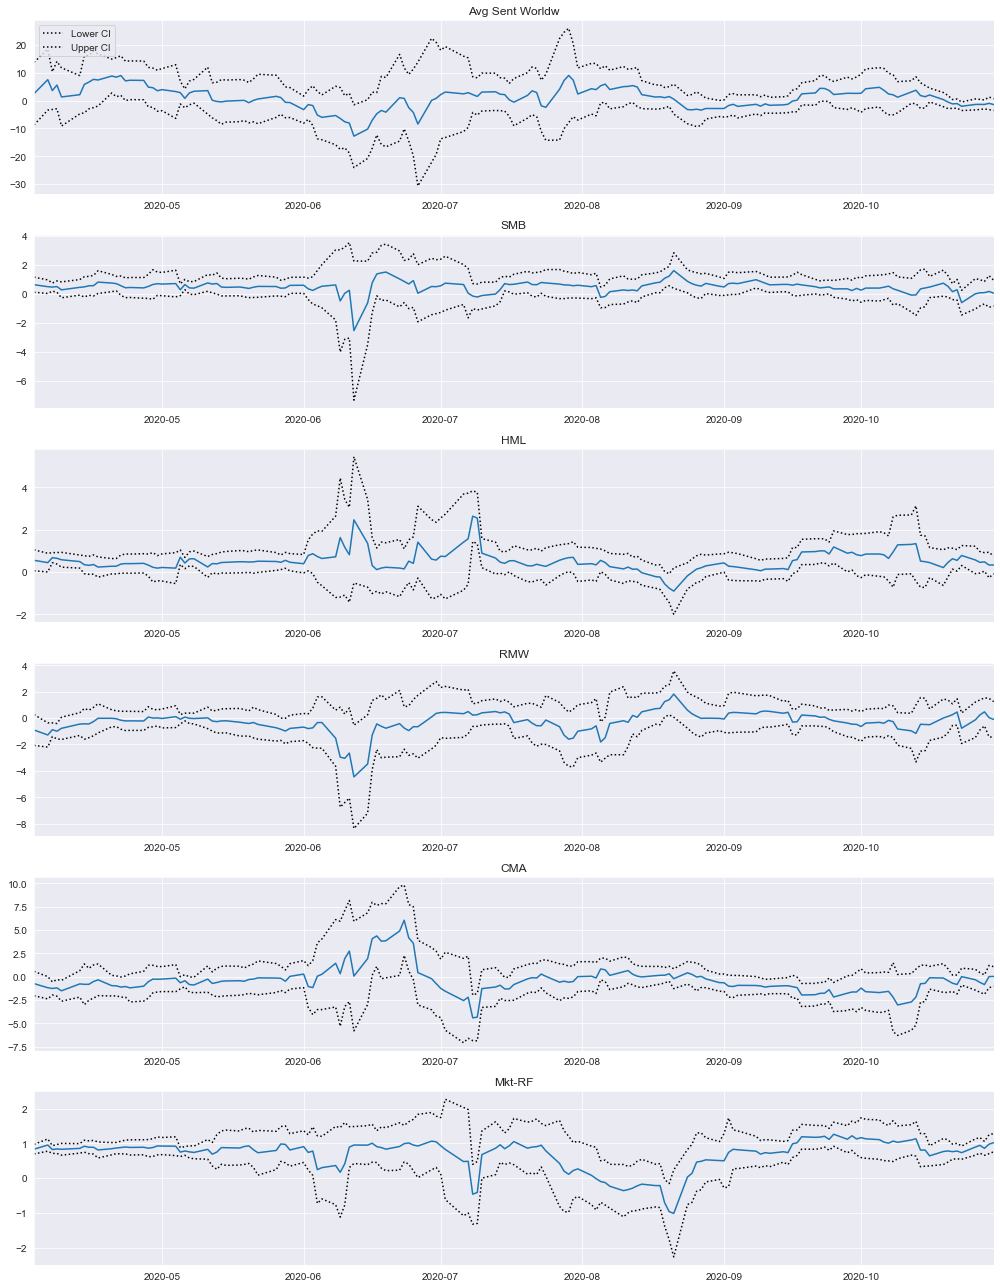

In [331]:
exog_vars = ['Avg Sent Worldw','SMB', 'HML','RMW','CMA','Mkt-RF']
exog = sm.add_constant(factors[exog_vars])
rols = RollingOLS(endog, exog, window=15)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=exog_vars, figsize=(14,18))

In [341]:
factors = factors.rename({'Avg Sent Worldw': 'Avg_Sent_Worldw'},axis=1)

In [344]:
joined = pd.concat([factors, industries], axis=1)
mod = RollingOLS.from_formula('Telcm ~ Avg_Sent_Worldw + SMB + HML + RMW + CMA', data=joined, window=60)
rres = mod.fit()
print(rres.params.tail())

            Intercept  Avg_Sent_Worldw       SMB       HML       RMW       CMA
Day                                                                           
2020-10-26  -0.631731        -1.554036  1.040169 -0.318310  0.927424 -0.291632
2020-10-27  -0.652909        -1.661546  1.083983 -0.347120  0.899191 -0.156539
2020-10-28  -0.653162        -1.398072  1.139755 -0.398387  1.069723 -0.232838
2020-10-29  -0.569566        -1.269956  1.182519 -0.436486  1.075908 -0.092060
2020-10-30  -0.578075        -1.292496  1.175007 -0.424440  1.060344 -0.102712


In [345]:
joined = pd.concat([factors, industries], axis=1)
joined['Avg Sent Worldw'] = joined['Avg_Sent_Worldw']
mod = RollingOLS.from_formula('Manuf ~ Avg_Sent_Worldw + SMB + HML + RMW + CMA', data=joined, window=60)
rres = mod.fit()
print(rres.params.tail())

            Intercept  Avg_Sent_Worldw       SMB       HML       RMW       CMA
Day                                                                           
2020-10-26  -0.426092        -1.689225  1.595770 -0.616848  1.058906  0.606008
2020-10-27  -0.447205        -1.697445  1.555157 -0.559854  1.018982  0.619098
2020-10-28  -0.435316        -1.435961  1.627282 -0.621665  1.199518  0.557379
2020-10-29  -0.479492        -1.648257  1.585496 -0.642754  1.142777  0.724107
2020-10-30  -0.458264        -1.615562  1.575645 -0.641121  1.160887  0.720811


In [349]:
joined = pd.concat([factors, industries], axis=1)
joined['Avg Sent Worldw'] = joined['Avg_Sent_Worldw']
mod = RollingOLS.from_formula('Enrgy ~ Avg_Sent_Worldw + SMB + HML + RMW + CMA', data=joined, window=60)
rres = mod.fit()
print(rres.params.tail())

            Intercept  Avg_Sent_Worldw       SMB       HML       RMW       CMA
Day                                                                           
2020-10-26  -0.801242        -1.999402  1.609351 -0.104581  0.136855  1.537779
2020-10-27  -0.794412        -2.035627  1.655608 -0.156695  0.154396  1.581319
2020-10-28  -0.813797        -1.487939  1.745487 -0.246284  0.491346  1.400964
2020-10-29  -0.856683        -1.656723  1.709873 -0.256119  0.450060  1.500601
2020-10-30  -0.790134        -1.541018  1.695035 -0.268784  0.518460  1.507030


In [348]:
joined = pd.concat([factors, industries], axis=1)
joined['Avg Sent Worldw'] = joined['Avg_Sent_Worldw']
mod = RollingOLS.from_formula('Money ~ Avg_Sent_Worldw + SMB + HML + RMW + CMA', data=joined, window=60)
rres = mod.fit()
print(rres.params.tail())

            Intercept  Avg_Sent_Worldw       SMB       HML       RMW       CMA
Day                                                                           
2020-10-26  -0.242094        -1.056126  1.126070 -0.016649  0.929716  0.064341
2020-10-27  -0.261370        -1.119468  1.136551 -0.012978  0.899911  0.144897
2020-10-28  -0.239730        -0.922507  1.208403 -0.070957  1.047694  0.113037
2020-10-29  -0.257952        -1.048885  1.186018 -0.090720  1.009937  0.246529
2020-10-30  -0.257863        -1.039878  1.196751 -0.102653  1.017822  0.257771
